## Problem Statement

Define the problem you are finding answers for from the data given.

Find out what factors affect housing prices within Ames, IA. 

## Executive Summary

[Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## EDA
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- [Identify outliers.](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
   - possibly those that have more than one nominal value(example - Exterior one and two, 2 values to a property)
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

## Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

### Contents:


*All libraries used should be added here*

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('../datasets/train.csv', keep_default_na=False, dtype={'MS SubClass': np.object, 
                                                                           'Id' : np.object, 
                                                                           'PID': np.object})

In [3]:
train.head()

Id        PID MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
0  109  533352170          60        RL                  13517   Pave    NA   
1  544  531379050          60        RL           43     11492   Pave    NA   
2  153  535304180          20        RL           68      7922   Pave    NA   
3  318  916386060          60        RL           73      9802   Pave    NA   
4  255  906425045          50        RL           82     14235   Pave    NA   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0      NA    NA   
1       IR1          Lvl  ...            0         0      NA    NA   
2       Reg          Lvl  ...            0         0      NA    NA   
3       Reg          Lvl  ...            0         0      NA    NA   
4       IR1          Lvl  ...            0         0      NA    NA   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0           NA        0       3    2010        WD      130500  
1           NA        0       4    2009        WD      220000  
2           NA        0       1    2010        WD      109000  
3           NA        0       4    2010        WD      174000  
4           NA        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
train.shape

#missing one variable? 
#according to the kaggle doc = SIZE: 2930 observations, 82 variables
#but on kaggle challenge page, 81 variables is correct

(2051, 81)

In [5]:
train.isnull().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64

In [6]:
train.describe().transpose()

count           mean           std      min       25%  \
Lot Area         2051.0   10065.208191   6742.488909   1300.0    7500.0   
Overall Qual     2051.0       6.112140      1.426271      1.0       5.0   
Overall Cond     2051.0       5.562165      1.104497      1.0       5.0   
Year Built       2051.0    1971.708922     30.177889   1872.0    1953.5   
Year Remod/Add   2051.0    1984.190151     21.036250   1950.0    1964.5   
1st Flr SF       2051.0    1164.488055    396.446923    334.0     879.5   
2nd Flr SF       2051.0     329.329108    425.671046      0.0       0.0   
Low Qual Fin SF  2051.0       5.512921     51.068870      0.0       0.0   
Gr Liv Area      2051.0    1499.330083    500.447829    334.0    1129.0   
Full Bath        2051.0       1.577279      0.549279      0.0       1.0   
Half Bath        2051.0       0.371039      0.501043      0.0       0.0   
Bedroom AbvGr    2051.0       2.843491      0.826618      0.0       2.0   
Kitchen AbvGr    2051.0       1.042906      0.209790      0.0       1.0   
TotRms AbvGrd    2051.0       6.435885      1.560225      2.0       5.0   
Fireplaces       2051.0       0.590931      0.638516      0.0       0.0   
Wood Deck SF     2051.0      93.833740    128.549416      0.0       0.0   
Open Porch SF    2051.0      47.556802     66.747241      0.0       0.0   
Enclosed Porch   2051.0      22.571916     59.845110      0.0       0.0   
3Ssn Porch       2051.0       2.591419     25.229615      0.0       0.0   
Screen Porch     2051.0      16.511458     57.374204      0.0       0.0   
Pool Area        2051.0       2.397855     37.782570      0.0       0.0   
Misc Val         2051.0      51.574354    573.393985      0.0       0.0   
Mo Sold          2051.0       6.219893      2.744736      1.0       4.0   
Yr Sold          2051.0    2007.775719      1.312014   2006.0    2007.0   
SalePrice        2051.0  181469.701609  79258.659352  12789.0  129825.0   

                      50%       75%       max  
Lot Area           9430.0   11513.5  159000.0  
Overall Qual          6.0       7.0      10.0  
Overall Cond          5.0       6.0       9.0  
Year Built         1974.0    2001.0    2010.0  
Year Remod/Add     1993.0    2004.0    2010.0  
1st Flr SF         1093.0    1405.0    5095.0  
2nd Flr SF            0.0     692.5    1862.0  
Low Qual Fin SF       0.0       0.0    1064.0  
Gr Liv Area        1444.0    1728.5    5642.0  
Full Bath             2.0       2.0       4.0  
Half Bath             0.0       1.0       2.0  
Bedroom AbvGr         3.0       3.0       8.0  
Kitchen AbvGr         1.0       1.0       3.0  
TotRms AbvGrd         6.0       7.0      15.0  
Fireplaces            1.0       1.0       4.0  
Wood Deck SF          0.0     168.0    1424.0  
Open Porch SF        27.0      70.0     547.0  
Enclosed Porch        0.0       0.0     432.0  
3Ssn Porch            0.0       0.0     508.0  
Screen Porch          0.0       0.0     490.0  
Pool Area             0.0       0.0     800.0  
Misc Val              0.0       0.0   17000.0  
Mo Sold               6.0       8.0      12.0  
Yr Sold            2008.0    2009.0    2010.0  
SalePrice        162500.0  214000.0  611657.0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2051 non-null   object
 1   PID              2051 non-null   object
 2   MS SubClass      2051 non-null   object
 3   MS Zoning        2051 non-null   object
 4   Lot Frontage     2051 non-null   object
 5   Lot Area         2051 non-null   int64 
 6   Street           2051 non-null   object
 7   Alley            2051 non-null   object
 8   Lot Shape        2051 non-null   object
 9   Land Contour     2051 non-null   object
 10  Utilities        2051 non-null   object
 11  Lot Config       2051 non-null   object
 12  Land Slope       2051 non-null   object
 13  Neighborhood     2051 non-null   object
 14  Condition 1      2051 non-null   object
 15  Condition 2      2051 non-null   object
 16  Bldg Type        2051 non-null   object
 17  House Style      2051 non-null   

Sale Condition (Nominal): Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
Missing from dataset (looks like it was intentionally left off the kaggle)

### Dealing with Null Values
 4   Lot Frontage     1721 non-null   float64  - bascially the piece of property that is attached to the street, probably not common and not a random null value
 
 7   Alley            140 non-null    object   - NA is a valid category and the data dictionary confirms this
 
 26  Mas Vnr Type     2029 non-null   object   - None is a valid category and the data dictionary confirms this
 
 27  Mas Vnr Area     2029 non-null   float64  - should be the same as above, check this
 
 31  Bsmt Qual        1996 non-null   object   - NA is a valid category and the data dictionary confirms this
 
 32  Bsmt Cond        1996 non-null   object   - NA is a valid category and the data dictionary confirms this
 
 33  Bsmt Exposure    1993 non-null   object   - NA is a valid category and the data dictionary confirms this
 
 34  BsmtFin Type 1   1996 non-null   object  - should be NA as a valid category instead of '' , corrected to NA
 
 35  BsmtFin SF 1     2050 non-null   float64 - found a '' value and corrected to np.nan, float
 
 36  BsmtFin Type 2   1995 non-null   object - found two '' values, might be dropping both, dropping row 1327
 
 37  BsmtFin SF 2     2050 non-null   float64 - found one '' value, similar to one of the values above, resolved by dropping row 1327
 
 38  Bsmt Unf SF      2050 non-null   float64 - found one '' value, similar to one of the values above, resolved by dropping row 1327
 
 39  Total Bsmt SF    2050 non-null   float64 - found one '' value, similar to one of the values above, resolved by dropping row 1327
 
 48  Bsmt Full Bath   2049 non-null   float64 - given that the rest of the basement stats indicate a basement may not exist at this property, reassigning a 0 value to this row
 
 49  Bsmt Half Bath   2049 non-null   float64 - - given that the rest of the basement stats indicate a basement may not exist at this property, reassigning a 0 value to this row
 
 58  Fireplace Qu     1051 non-null   object - NA is a valid category and the data dictionary confirms this
 
 59  Garage Type      1938 non-null   object - NA is a valid category and the data dictionary confirms this
 
 60  Garage Yr Blt    1937 non-null   float64 - found '' values and corrected to np.nan, float
 
 61  Garage Finish    1937 non-null   object - found a '' value and dropping this row since i cannot deduce the missing values
 
 62  Garage Cars      2050 non-null   float64 - found a '' value and dropping this row since i cannot deduce the missing values and changed to int64
 
 63  Garage Area      2050 non-null   float64 - found a '' value and dropping this row since i cannot deduce the missing values and changed to int64
 
 64  Garage Qual      1937 non-null   object - found a '' value and dropping this row since i cannot deduce the missing values
 
 65  Garage Cond      1937 non-null   object - found a '' value and dropping this row since i cannot deduce the missing values
 
 73  Pool QC          9 non-null      object - NA is a valid category and the data dictionary confirms this
 
 74  Fence            400 non-null    object - NA is a valid category and the data dictionary confirms this
 
 75  Misc Feature     65 non-null     object - NA is a valid category and the data dictionary confirms this
 

In [8]:
train.loc[train['Lot Frontage']=='']

Id        PID MS SubClass MS Zoning Lot Frontage  Lot Area Street  \
0      109  533352170          60        RL                  13517   Pave   
7      145  535154050          20        RL                  12160   Pave   
8     1942  535353130          20        RL                  15783   Pave   
23      12  527165230          20        RL                   7980   Pave   
27    1534  909277040          50        RL                  11700   Pave   
...    ...        ...         ...       ...          ...       ...    ...   
2016   560  532376110          20        RL                   7791   Pave   
2022  2872  909475020          20        RL                  16381   Pave   
2028  2526  534127190          20        RL                  20781   Pave   
2031    25  527402250          20        RL                  12537   Pave   
2047   785  905377130          30        RL                  12342   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
0       NA       IR1          Lvl  ...            0         0      NA     NA   
7       NA       IR1          Lvl  ...            0         0      NA  MnPrv   
8       NA       Reg          Lvl  ...            0         0      NA  MnPrv   
23      NA       IR1          Lvl  ...            0         0      NA  GdPrv   
27    Grvl       IR1          HLS  ...            0         0      NA     NA   
...    ...       ...          ...  ...          ...       ...     ...    ...   
2016    NA       IR1          Lvl  ...            0         0      NA   GdWo   
2022    NA       IR1          Lvl  ...            0         0      NA     NA   
2028    NA       IR2          Lvl  ...            0         0      NA     NA   
2031    NA       IR1          Lvl  ...            0         0      NA     NA   
2047    NA       IR1          Lvl  ...            0         0      NA     NA   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0              NA        0       3    2010        WD      130500  
7              NA        0       5    2010        COD     142000  
8            Shed      400       6    2007        WD      112500  
23           Shed      500       3    2010        WD      185000  
27             NA        0       7    2008        WD      198000  
...           ...      ...     ...     ...        ...        ...  
2016           NA        0      10    2009        WD      129000  
2022           NA        0      12    2006        WD      223000  
2028           NA        0       6    2006        WD      262500  
2031           NA        0       4    2010        WD      149900  
2047           NA        0       3    2009        WD       82500  

[330 rows x 81 columns]

In [9]:
train['Lot Frontage'].unique()

array(['', '43', '68', '73', '82', '137', '35', '70', '21', '64', '120',
       '24', '74', '93', '34', '80', '71', '72', '109', '40', '103',
       '100', '92', '65', '75', '60', '30', '79', '41', '105', '107',
       '81', '36', '63', '32', '94', '44', '50', '48', '67', '88', '83',
       '53', '58', '57', '52', '87', '134', '56', '54', '140', '78', '85',
       '90', '96', '62', '49', '59', '155', '91', '61', '86', '128', '77',
       '42', '89', '51', '69', '55', '112', '76', '125', '98', '113',
       '102', '22', '122', '84', '119', '118', '66', '95', '108', '195',
       '106', '39', '110', '130', '97', '45', '37', '123', '38', '129',
       '115', '47', '114', '104', '46', '121', '124', '313', '141', '101',
       '99', '160', '174', '26', '144', '138', '111', '25', '33', '200',
       '150', '117', '153', '116', '135'], dtype=object)

In [10]:
train['Lot Frontage'].replace([''], np.nan, inplace=True)

In [11]:
train['Lot Frontage'] = train['Lot Frontage'].astype(float)
train['Lot Frontage'].dtype

dtype('float64')

In [12]:
train['Lot Frontage'].isnull().sum()

330

In [13]:
train['Alley'].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [14]:
train['BsmtFin Type 1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', 'NA', 'BLQ', 'LwQ', ''], dtype=object)

In [15]:
train['BsmtFin Type 1'].replace([''], 'NA', inplace=True)

In [16]:
train.loc[train['BsmtFin Type 1']=='NA']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
12     807  906226060          70        RL         120.0     26400   Pave   
93     811  906226100          90        RL          64.0      7018   Pave   
114    781  905228050          20        RL           NaN      9000   Pave   
146    888  908128060          85        RL          64.0      7301   Pave   
183   1554  910251050          20   A (agr)          80.0     14584   Pave   
240   2740  905451050          20        RL          80.0     12048   Pave   
249   2242  910206010          50        RM          64.0     11067   Pave   
256   2745  905477010          20        RL          77.0      8335   Pave   
390     84  532351140          90        RM          68.0      8930   Pave   
437   1501  908201100          90        RL          65.0      6040   Pave   
485    155  535327140          20        RL          60.0      7200   Pave   
499    812  906226110          90        RL          64.0      7018   Pave   
514   2082  905475520          30        RL           NaN     11515   Pave   
580   1504  908204160          90        RL          74.0      6845   Pave   
581    946  912251110          30   I (all)         109.0     21780   Grvl   
616   1498  908154080          20        RL         123.0     47007   Pave   
635   2904  923125030          20   A (agr)         125.0     31250   Pave   
642    953  914476020          90        RL          75.0     10125   Pave   
696    274  908102060          30        RL          67.0      8777   Pave   
700    207  903454060         190        RM          70.0      5600   Pave   
737    788  905402070          20        RL           NaN     15635   Pave   
772    679  535451170          90        RL          60.0      7200   Pave   
790   1205  534276190          20        RL          74.0      7785   Pave   
794   1255  535375140          20        RL          60.0     10122   Pave   
924    677  535450160          90        RL          60.0      8544   Pave   
933   1375  904101170          50        RL          80.0     17120   Pave   
954   2622  535451190          20        RL          60.0      7200   Pave   
1007  1880  534252070          90        RL           NaN     10899   Pave   
1022  2703  904301410          30        RL          55.0      8250   Pave   
1049  2177  908152180          90        RL           NaN      9555   Pave   
1089   709  902205010          30        RM          50.0      5925   Pave   
1098  1260  535383100         190        RL          60.0     10800   Pave   
1125  2626  535454050          90        RL           NaN      8544   Pave   
1157   897  908225370          50        RL          50.0      8405   Pave   
1211  2893  916252170         120        RM           NaN      8239   Pave   
1222  1326  902427045          20        RM          70.0     12702   Pave   
1252   244  905478190          20        RL          60.0     11100   Pave   
1256   813  906226120          90        RL          64.0      7018   Pave   
1270  1569  914476080          90        RL          76.0     10260   Pave   
1327  1342  903230120          20        RM          99.0      5940   Pave   
1331   650  535353060          20        RL          75.0      9533   Pave   
1377  2707  905101330          90        RL          72.0     10791   Pave   
1387   787  905402060          20        RL           NaN     13680   Pave   
1428  1902  534450090          20        RL          50.0      5000   Pave   
1481  2701  904100170          20        RL         100.0     21370   Pave   
1594  1502  908201110          90        RL          65.0      6012   Pave   
1620   815  906226140          90        RL          64.0      7007   Pave   
1681  1899  534429030          90        RL          70.0      9842   Pave   
1684  2004  902427140          20        RM          52.0      8626   Pave   
1686  2627  535454060          90        RL          60.0      8544   Pave   
1859  2625  535454030         

In [17]:
train['BsmtFin SF 1'].unique()

array(['533', '637', '731', '0', '247', '547', '1000', '292', '650',
       '387', '393', '813', '24', '651', '492', '1158', '935', '1056',
       '1312', '553', '606', '1104', '437', '441', '1288', '548', '705',
       '916', '420', '830', '1386', '1097', '906', '210', '408', '354',
       '353', '622', '790', '176', '371', '368', '486', '85', '138',
       '524', '64', '1092', '360', '172', '206', '246', '16', '1346',
       '700', '655', '443', '168', '1904', '240', '864', '415', '833',
       '377', '280', '828', '762', '36', '1014', '60', '588', '438',
       '1153', '527', '1337', '348', '1044', '690', '962', '641', '1110',
       '421', '832', '1027', '988', '821', '290', '435', '827', '312',
       '410', '257', '378', '389', '1619', '468', '458', '120', '732',
       '659', '954', '1032', '425', '841', '644', '189', '685', '111',
       '918', '674', '789', '608', '573', '708', '129', '311', '104',
       '386', '704', '457', '170', '1173', '156', '600', '788', '550',
       '

In [18]:
train.loc[train['BsmtFin SF 1']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1327  1342  903230120          20        RM          99.0      5940   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
1327    NA       IR1          Lvl  ...            0         0      NA  MnPrv   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1327           NA        0       4    2008      ConLD      79000  

[1 rows x 81 columns]

In [19]:
train['BsmtFin SF 1'].replace([''], np.nan, inplace=True)

In [20]:
train['BsmtFin SF 1'].isnull().sum()

1

In [21]:
train['BsmtFin SF 1'] = train['BsmtFin SF 1'].astype(float)
train['BsmtFin SF 1'].dtype

dtype('float64')

In [22]:
train['BsmtFin Type 2'].unique()

array(['Unf', 'Rec', 'NA', 'BLQ', 'GLQ', 'LwQ', 'ALQ', ''], dtype=object)

In [23]:
train.loc[train['BsmtFin Type 2']=='', ['Bsmt Cond','BsmtFin Type 2','BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF']]
#1327 looks problematic, revisit dropping it after looking through the rest of the null values
#1147 as well, as it is hard to assign either NA or Unf to it given that the basement measurements don't add up

Bsmt Cond BsmtFin Type 2  BsmtFin SF 1 Bsmt Unf SF Total Bsmt SF
1147        TA                       1124.0        1603          3206
1327                                    NaN

In [24]:
train.loc[train['BsmtFin Type 2']=='Unf', ['Bsmt Cond','BsmtFin Type 2','BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF']]

Bsmt Cond BsmtFin Type 2  BsmtFin SF 1 Bsmt Unf SF Total Bsmt SF
0           TA            Unf         533.0         192           725
1           TA            Unf         637.0         276           913
2           TA            Unf         731.0         326          1057
3           TA            Unf           0.0         384           384
4           Gd            Unf           0.0         676           676
...        ...            ...           ...         ...           ...
2045        TA            Unf        1336.0         596          1932
2046        TA            Unf        1011.0         873          1884
2047        TA            Unf         262.0         599           861
2048        TA            Unf           0.0         896           896
2050        TA            Unf           0.0         994           994

[1749 rows x 5 columns]

In [25]:
train['BsmtFin SF 2'].unique()

array(['0', '713', '117', '1057', '173', '290', '420', '469', '42', '955',
       '483', '147', '596', '206', '382', '546', '202', '228', '661',
       '279', '106', '321', '232', '956', '670', '915', '116', '1080',
       '80', '215', '144', '590', '149', '281', '297', '612', '468',
       '891', '622', '507', '432', '852', '108', '128', '294', '1061',
       '127', '712', '125', '324', '252', '247', '72', '150', '906',
       '555', '38', '180', '64', '288', '311', '227', '842', '620', '181',
       '162', '354', '539', '551', '110', '219', '547', '186', '774',
       '123', '613', '167', '230', '495', '208', '308', '604', '154',
       '334', '417', '624', '442', '497', '211', '1474', '532', '132',
       '829', '1127', '435', '174', '105', '375', '608', '1039', '1063',
       '264', '270', '259', '531', '488', '500', '41', '177', '169',
       '344', '869', '182', '768', '119', '619', '345', '645', '278',
       '113', '466', '522', '6', '377', '92', '859', '479', '239', '1083',
  

In [26]:
train.loc[train['BsmtFin SF 2']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1327  1342  903230120          20        RM          99.0      5940   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
1327    NA       IR1          Lvl  ...            0         0      NA  MnPrv   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1327           NA        0       4    2008      ConLD      79000  

[1 rows x 81 columns]

In [27]:
train.loc[train['Bsmt Unf SF']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1327  1342  903230120          20        RM          99.0      5940   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
1327    NA       IR1          Lvl  ...            0         0      NA  MnPrv   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1327           NA        0       4    2008      ConLD      79000  

[1 rows x 81 columns]

In [28]:
train.drop([1327], inplace=True)

In [29]:
train.shape

(2050, 81)

In [30]:
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].astype(float)
train['BsmtFin SF 2'].dtype

dtype('float64')

In [31]:
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].astype(float)
train['Bsmt Unf SF'].dtype

dtype('float64')

In [32]:
train.loc[train['Total Bsmt SF']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [33]:
train['Bsmt Full Bath'].unique()

array(['0', '1', '2', '', '3'], dtype=object)

In [34]:
train.loc[train['Bsmt Full Bath']=='', ['Bsmt Half Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bsmt Cond','BsmtFin Type 2','BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF']]

#given that the rest of the basement stats indicate a basement may not exist at this property
#reassigning a 0 value to this row

Bsmt Half Bath Bsmt Half Bath  Full Bath  Half Bath Bsmt Cond  \
616                                        3          1        NA   

    BsmtFin Type 2  BsmtFin SF 1  Bsmt Unf SF Total Bsmt SF  
616             NA           0.0          0.0             0

In [35]:
train['Bsmt Full Bath'].replace([''], 0, inplace=True)

In [36]:
train['Bsmt Half Bath'].replace([''], 0, inplace=True)

In [37]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].astype(int)
train['Bsmt Full Bath'].dtype

dtype('int64')

In [38]:
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].astype(int)
train['Bsmt Half Bath'].dtype

dtype('int64')

In [39]:
train.loc[train['Bsmt Half Bath']==0, ['Bsmt Half Bath', 
                                        'Bsmt Half Bath', 'Full Bath', 
                                        'Half Bath', 'Bsmt Cond',
                                        'BsmtFin Type 2',
                                        'BsmtFin SF 1', 
                                        'Bsmt Unf SF', 
                                        'Total Bsmt SF']]

Bsmt Half Bath  Bsmt Half Bath  Full Bath  Half Bath Bsmt Cond  \
0                  0               0          2          1        TA   
1                  0               0          2          1        TA   
2                  0               0          1          0        TA   
3                  0               0          2          1        TA   
4                  0               0          2          0        Gd   
...              ...             ...        ...        ...       ...   
2046               0               0          2          0        TA   
2047               0               0          1          0        TA   
2048               0               0          1          1        TA   
2049               0               0          1          0        TA   
2050               0               0          2          1        TA   

     BsmtFin Type 2  BsmtFin SF 1  Bsmt Unf SF Total Bsmt SF  
0               Unf         533.0        192.0           725  
1               Unf         637.0        276.0           913  
2               Unf         731.0        326.0          1057  
3               Unf           0.0        384.0           384  
4               Unf           0.0        676.0           676  
...             ...           ...          ...           ...  
2046            Unf        1011.0        873.0          1884  
2047            Unf         262.0        599.0           861  
2048            Unf           0.0        896.0           896  
2049            LwQ         155.0        295.0          1200  
2050            Unf           0.0        994.0           994  

[1924 rows x 9 columns]

In [40]:
train['Bsmt Half Bath'].unique()

array([0, 1, 2])

In [41]:
train['Bsmt Full Bath'].unique()

array([0, 1, 2, 3])

In [42]:
train['Fireplace Qu'].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [43]:
train['Fireplace Qu'].isnull().sum()

0

In [44]:
train['Garage Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'NA', '2Types',
       'CarPort'], dtype=object)

In [45]:
train['Garage Type'].isnull().sum()

0

In [46]:
train['Garage Yr Blt'].unique()

array(['1976', '1997', '1953', '2007', '1957', '1966', '2005', '1959',
       '1952', '1969', '1971', '1900', '2000', '2004', '1916', '1963',
       '1977', '2009', '1968', '1992', '1955', '1961', '1973', '1937', '',
       '2003', '1981', '1931', '1995', '1958', '1965', '2006', '1978',
       '1954', '1935', '1951', '1996', '1999', '1920', '1930', '1924',
       '1960', '1949', '1986', '1956', '1994', '1979', '1964', '2001',
       '1972', '1939', '1962', '1927', '1948', '1967', '1993', '2010',
       '1915', '1987', '1970', '1988', '1982', '1941', '1984', '1942',
       '1950', '2002', '1975', '2008', '1974', '1998', '1918', '1938',
       '1985', '1923', '1980', '1991', '1946', '1940', '1990', '1896',
       '1983', '1914', '1945', '1921', '1925', '1926', '1936', '1932',
       '1947', '1929', '1910', '1917', '1922', '1934', '1989', '1928',
       '2207', '1933', '1895', '1919'], dtype=object)

In [47]:
train.loc[train['Garage Yr Blt']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
28    2243  911103060         190   C (all)          75.0      8250   Pave   
53     330  923226250         160        RM          21.0      1476   Pave   
65    2278  923202134          20        RL          70.0      8402   Pave   
79    2235  910201050          50        RM          50.0      7288   Pave   
101   2084  905476170          30        RL          58.0      9098   Pave   
...    ...        ...         ...       ...           ...       ...    ...   
1991   325  923204150          90        RL          94.0      9400   Pave   
2010  2880  911175410          30   C (all)          69.0     12366   Pave   
2027  2628  535456010          90        RL          75.0      8512   Pave   
2039  2288  923228220         160        RM          21.0      1495   Pave   
2042  2842  909101080          50        RL          45.0      8248   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
28      NA       Reg          Lvl  ...            0         0      NA    NA   
53      NA       Reg          Lvl  ...            0         0      NA    NA   
65      NA       Reg          Lvl  ...            0         0      NA    NA   
79      NA       Reg          Lvl  ...            0         0      NA    NA   
101     NA       IR1          Lvl  ...            0         0      NA    NA   
...    ...       ...          ...  ...          ...       ...     ...   ...   
1991    NA       Reg          Low  ...            0         0      NA    NA   
2010    NA       Reg          Lvl  ...            0         0      NA    NA   
2027    NA       Reg          Lvl  ...            0         0      NA    NA   
2039    NA       Reg          Lvl  ...            0         0      NA    NA   
2042  Grvl       Reg          Lvl  ...            0         0      NA    NA   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
28             NA        0       6    2007        WD      119600  
53             NA        0       3    2010        WD       76000  
65             NA        0      12    2007        New     147000  
79             NA        0       9    2007        WD      129850  
101            NA        0       7    2007        WD       86000  
...           ...      ...     ...     ...        ...        ...  
1991           NA        0       4    2010        WD      139000  
2010           NA        0      10    2006        WD       51689  
2027           NA        0       9    2006        WD      119000  
2039           NA        0       5    2007        WD       93900  
2042           NA        0       9    2006        COD      83000  

[114 rows x 81 columns]

In [48]:
train['Garage Yr Blt'].replace([''], np.nan, inplace=True)

In [49]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].astype(float)
train['Garage Yr Blt'].dtype

dtype('float64')

In [50]:
train['Garage Yr Blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [51]:
train['Garage Finish'].unique()

array(['RFn', 'Unf', 'Fin', 'NA', ''], dtype=object)

In [52]:
train.loc[train['Garage Finish']=='', ['Garage Area', 
                                       'Garage Qual', 
                                       'Garage Cond', 
                                       'Garage Yr Blt', 
                                       'Garage Type', 
                                       'Paved Drive']]

Garage Area Garage Qual Garage Cond  Garage Yr Blt Garage Type  \
1712                                                NaN      Detchd   

     Paved Drive  
1712           Y

In [53]:
#dropping this row since i cannot deduce the missing values
train.drop([1712], inplace=True)
train.shape

(2049, 81)

In [54]:
train['Garage Cars'].unique()

array(['2', '1', '3', '0', '4', '5'], dtype=object)

In [55]:
train['Garage Cars'] = train['Garage Cars'].astype(int)
train['Garage Cars'].dtype

dtype('int64')

In [56]:
train['Garage Area'].unique()

array(['475', '559', '246', '400', '484', '578', '525', '531', '420',
       '504', '264', '632', '576', '480', '610', '624', '513', '528',
       '614', '450', '499', '575', '572', '530', '336', '240', '0', '542',
       '481', '410', '826', '384', '546', '276', '850', '602', '352',
       '786', '660', '270', '280', '474', '440', '564', '299', '293',
       '386', '671', '550', '690', '225', '350', '216', '380', '843',
       '539', '834', '322', '1166', '720', '392', '555', '252', '502',
       '516', '608', '495', '396', '556', '725', '670', '560', '501',
       '490', '286', '360', '479', '626', '470', '304', '864', '403',
       '579', '288', '473', '627', '758', '431', '260', '366', '852',
       '672', '486', '656', '716', '442', '297', '388', '461', '447',
       '619', '308', '506', '319', '676', '312', '478', '342', '393',
       '983', '923', '487', '543', '453', '541', '754', '666', '529',
       '714', '968', '788', '812', '600', '483', '300', '430', '230',
       '505', 

In [57]:
train.loc[train['Garage Area']=='', ['Garage Area', 
                             'Garage Qual', 
                             'Garage Cond', 
                             'Garage Yr Blt', 
                             'Garage Type', 
                             'Paved Drive']]

Empty DataFrame
Columns: [Garage Area, Garage Qual, Garage Cond, Garage Yr Blt, Garage Type, Paved Drive]
Index: []

In [58]:
train['Garage Area'] = train['Garage Area'].astype(int)
train['Garage Area'].dtype

dtype('int64')

In [59]:
train['Garage Qual'].unique()

array(['TA', 'Fa', 'NA', 'Gd', 'Ex', 'Po'], dtype=object)

In [60]:
train['Garage Cond'].unique()

array(['TA', 'Fa', 'NA', 'Po', 'Gd', 'Ex'], dtype=object)

In [61]:
train['Pool QC'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [62]:
train['Fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [63]:
train['Misc Feature'].unique()

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [64]:
train.loc[train['Mas Vnr Type']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
22    2393  528142010          60        RL         103.0     12867   Pave   
41    2383  528110050          20        RL         107.0     13891   Pave   
86     539  531371050          20        RL          67.0     10083   Pave   
212    518  528458020          20        FV          90.0      7993   Pave   
276   2824  908130020          20        RL          75.0      8050   Pave   
338   1800  528458150          60        FV         112.0     12217   Pave   
431   1455  907251090          60        RL          75.0      9473   Pave   
451   1120  528439010          20        RL          87.0     10037   Pave   
591   1841  533208040         120        FV          35.0      4274   Pave   
844   1840  533208030         120        FV          30.0      5330   Pave   
913   2230  909475070          20        RL           NaN     32668   Pave   
939   1123  528462040          20        FV          95.0     11639   Pave   
1025  1784  528435010          20        RL          85.0      9965   Pave   
1244   485  528275160          60        RL           NaN     12891   Pave   
1306  1752  528250010          80        RL           NaN     11950   Pave   
1430  1185  534104100          60        FV           NaN      7500   Pave   
1434  1128  528480160          60        FV          65.0      8125   Pave   
1606  1096  528290090          60        RL           NaN      7750   Pave   
1699  2261  916384070          20        RL          68.0      8298   Pave   
1815  2456  528429100          20        RL          49.0     15218   Pave   
1820  1728  528218010          60        RL          59.0     15810   Pave   
1941    56  528240070          60        RL           NaN      7851   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
22      NA       IR1          Lvl  ...            0         0      NA    NA   
41      NA       Reg          Lvl  ...            0         0      NA    NA   
86      NA       Reg          Lvl  ...            0         0      NA    NA   
212     NA       IR1          Lvl  ...            0         0      NA    NA   
276     NA       Reg          Lvl  ...            0         0      NA    NA   
338     NA       IR1          Lvl  ...            0         0      NA    NA   
431     NA       Reg          Lvl  ...            0         0      NA    NA   
451     NA       Reg          Lvl  ...            0         0      NA    NA   
591   Pave       IR1          Lvl  ...            0         0      NA    NA   
844   Pave       IR2          Lvl  ...            0         0      NA    NA   
913     NA       IR1          Lvl  ...            0         0      NA    NA   
939     NA       Reg          Lvl  ...            0         0      NA    NA   
1025    NA       Reg          Lvl  ...            0         0      NA    NA   
1244    NA       IR1          Lvl  ...            0         0      NA    NA   
1306    NA       IR1          Lvl  ...            0         0      NA    NA   
1430    NA       Reg          Lvl  ...            0         0      NA    NA   
1434    NA       Reg          Lvl  ...            0         0      NA    NA   
1606    NA       Reg          Lvl  ...            0         0      NA    NA   
1699    NA       IR1          HLS  ...            0         0      NA    NA   
1815    NA       IR1          Lvl  ...            0         0      NA    NA   
1820    NA       IR1          Lvl  ...            0         0      NA    NA   
1941    NA       Reg          Lvl  ...            0         0      NA    NA   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
22             NA        0       7    2006        New     344133  
41             NA        0       9    2006        New     465000  
86             NA        0       8    2009        WD      184900  
212            NA        0      10    2009        New     225000  
276            NA        0       4    2006        WD      11

In [65]:
train['Mas Vnr Type'].replace([''], np.nan, inplace=True)

In [66]:
train.loc[train['Mas Vnr Type']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [67]:
train['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [68]:
train['Mas Vnr Area'].unique()

array(['289', '132', '0', '82', '180', '192', '232', '456', '148', '',
       '3', '336', '480', '320', '104', '335', '40', '110', '106', '513',
       '184', '522', '143', '348', '117', '510', '145', '96', '668', '50',
       '228', '65', '361', '748', '197', '572', '128', '120', '254', '86',
       '30', '54', '246', '397', '296', '144', '902', '261', '260', '275',
       '57', '1050', '359', '108', '662', '500', '210', '165', '208',
       '360', '160', '64', '224', '206', '116', '651', '504', '252',
       '337', '84', '309', '466', '600', '189', '368', '198', '140',
       '922', '16', '18', '90', '425', '245', '234', '766', '219', '182',
       '136', '576', '270', '150', '256', '176', '479', '647', '115',
       '221', '272', '714', '95', '170', '172', '200', '205', '162',
       '240', '100', '412', '564', '74', '468', '298', '149', '604',
       '105', '428', '332', '452', '164', '660', '365', '1115', '157',
       '525', '41', '324', '216', '236', '174', '340', '274', '39', '

In [69]:
train['Mas Vnr Area'].replace([''], np.nan, inplace=True)

In [70]:
train.loc[train['Mas Vnr Area']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [71]:
train['Mas Vnr Area'] = train['Mas Vnr Area'].astype(float)
train['Mas Vnr Area'].dtype

dtype('float64')

In [72]:
train.loc[train['Total Bsmt SF']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [73]:
train['Total Bsmt SF'] = train['Total Bsmt SF'].astype(float)
train['Total Bsmt SF'].dtype

dtype('float64')

In [74]:
train.loc[train['Bsmt Exposure']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1456  1797  528458090          60        FV          81.0     10411   Pave   
1547    67  528445060          20        RL          73.0      8987   Pave   
1997  2780  907194130          60        RL          65.0     14006   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
1456    NA       Reg          Lvl  ...            0         0      NA    NA   
1547    NA       Reg          Lvl  ...            0         0      NA    NA   
1997    NA       IR1          Lvl  ...            0         0      NA    NA   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1456           NA        0       7    2007        New     212109  
1547           NA        0       5    2010        WD      221500  
1997           NA        0       2    2006        WD      192500  

[3 rows x 81 columns]

In [75]:
train['Bsmt Exposure'].replace([''], np.nan, inplace=True)
train.loc[train['Bsmt Exposure']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [76]:
train['Bsmt Exposure'].unique()

array(['No', 'Gd', 'Av', 'NA', 'Mn', nan], dtype=object)

Checking the test dataset

In [77]:
test = pd.read_csv('../datasets/test.csv', keep_default_na=False, dtype={'MS SubClass': np.object, 
                                                                           'Id' : np.object, 
                                                                           'PID': np.object})

In [78]:
test.head()

Id        PID MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
0  2658  902301120         190        RM           69      9142   Pave  Grvl   
1  2718  905108090          90        RL                   9662   Pave    NA   
2  2414  528218130          60        RL           58     17104   Pave    NA   
3  1989  902207150          30        RM           60      8520   Pave    NA   
4   625  535105100          20        RL                   9500   Pave    NA   

  Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC Fence  \
0       Reg          Lvl  ...          0            0         0      NA    NA   
1       IR1          Lvl  ...          0            0         0      NA    NA   
2       IR1          Lvl  ...          0            0         0      NA    NA   
3       Reg          Lvl  ...          0            0         0      NA    NA   
4       IR1          Lvl  ...          0          185         0      NA    NA   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0           NA        0       4     2006        WD   
1           NA        0       8     2006        WD   
2           NA        0       9     2006        New  
3           NA        0       7     2007        WD   
4           NA        0       7     2009        WD   

[5 rows x 80 columns]

In [79]:
test.shape

(879, 80)

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               879 non-null    object
 1   PID              879 non-null    object
 2   MS SubClass      879 non-null    object
 3   MS Zoning        879 non-null    object
 4   Lot Frontage     879 non-null    object
 5   Lot Area         879 non-null    int64 
 6   Street           879 non-null    object
 7   Alley            879 non-null    object
 8   Lot Shape        879 non-null    object
 9   Land Contour     879 non-null    object
 10  Utilities        879 non-null    object
 11  Lot Config       879 non-null    object
 12  Land Slope       879 non-null    object
 13  Neighborhood     879 non-null    object
 14  Condition 1      879 non-null    object
 15  Condition 2      879 non-null    object
 16  Bldg Type        879 non-null    object
 17  House Style      879 non-null    ob

In [81]:
test['Lot Frontage'].unique()

array(['69', '', '58', '60', '21', '52', '39', '75', '50', '68', '80',
       '121', '51', '65', '74', '73', '40', '46', '61', '85', '136', '34',
       '70', '59', '130', '100', '77', '131', '67', '79', '98', '53',
       '95', '37', '106', '90', '120', '72', '76', '118', '24', '78',
       '86', '102', '66', '112', '63', '57', '110', '89', '103', '105',
       '48', '43', '160', '31', '55', '84', '44', '150', '35', '64', '71',
       '122', '174', '49', '47', '93', '56', '149', '87', '168', '82',
       '36', '41', '96', '88', '83', '45', '94', '54', '30', '124', '81',
       '42', '152', '115', '113', '101', '104', '116', '62', '114', '107',
       '33', '99', '91', '97', '126', '28', '108', '133', '32', '92',
       '182'], dtype=object)

In [82]:
test.loc[test['Lot Frontage']=='']

Id        PID MS SubClass MS Zoning Lot Frontage  Lot Area Street  \
1    2718  905108090          90        RL                   9662   Pave   
4     625  535105100          20        RL                   9500   Pave   
7     858  907202130          20        RL                   9286   Pave   
13    818  906230030          90        RL                   7976   Pave   
20    222  905105070          20        RL                   8246   Pave   
..    ...        ...         ...       ...          ...       ...    ...   
854  2582  535301010          90        RL                   7032   Pave   
860   984  923275140          20        RL                   8780   Pave   
867  2271  916460020          20        RL                   7777   Pave   
868  1633  527182170         160        RL                   5062   Pave   
870  2765  906426090          20        RL                  36500   Pave   

    Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area  \
1      NA       IR1          Lvl  ...          0            0         0   
4      NA       IR1          Lvl  ...          0          185         0   
7      NA       IR1          Lvl  ...          0            0         0   
13     NA       Reg          Lvl  ...          0            0         0   
20     NA       IR1          Lvl  ...          0            0         0   
..    ...       ...          ...  ...        ...          ...       ...   
854    NA       IR1          Lvl  ...          0            0         0   
860    NA       IR1          Lvl  ...          0            0         0   
867    NA       IR1          Lvl  ...          0            0         0   
868    NA       IR1          Lvl  ...          0            0         0   
870    NA       IR1          Low  ...          0            0         0   

    Pool QC  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
1        NA     NA           NA        0       8     2006        WD   
4        NA     NA           NA        0       7     2009        WD   
7        NA     NA           NA        0      10     2009        WD   
13       NA     NA           NA        0      10     2009        WD   
20       NA  MnPrv           NA        0       5     2010        WD   
..      ...    ...          ...      ...     ...      ...        ...  
854      NA     NA           NA        0      12     2006        WD   
860      NA  MnPrv           NA        0       3     2009        WD   
867      NA     NA           NA        0      11     2007        WD   
868      NA     NA           NA        0       9     2007        WD   
870      NA     NA           NA        0       6     2006        WD   

[160 rows x 80 columns]

In [83]:
test_data_cleaning = pd.read_csv('../datasets/test.csv')

In [84]:
test_data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

4   Lot Frontage     719 non-null    float64 - found '' values and corrected, changed to float

7   Alley            58 non-null     object - NA is a valid category and the data dictionary confirms this 

31  Bsmt Qual        854 non-null    object - NA is a valid category and the data dictionary confirms this

32  Bsmt Cond        854 non-null    object - NA is a valid category and the data dictionary confirms this

33  Bsmt Exposure    854 non-null    object - NA is a valid category and the data dictionary confirms this 

34  BsmtFin Type 1   854 non-null    object - NA is a valid category and the data dictionary confirms this 

58  Fireplace Qu     457 non-null    object - NA is a valid category and the data dictionary confirms this

59  Garage Type      835 non-null    object - NA is a valid category and the data dictionary confirms this

60  Garage Yr Blt    834 non-null    float64 - found a few '' values that have been corrected to np.nan and changing to float

61  Garage Finish    834 non-null    object - found one row with missing values but could not deduce missing values, dropping this row

64  Garage Qual      834 non-null    object - found one row with missing values but could not deduce missing values, dropping this row

65  Garage Cond      834 non-null    object - found one row with missing values but could not deduce missing values, dropping this row

73  Pool QC          4 non-null      object - NA is a valid category and the data dictionary confirms this

74  Fence            172 non-null    object - NA is a valid category and the data dictionary confirms this

75  Misc Feature     41 non-null     object - NA is a valid category and the data dictionary confirms this


In [85]:
test['Lot Frontage'].replace([''], np.nan, inplace=True)
test['Lot Frontage'].unique()

array(['69', nan, '58', '60', '21', '52', '39', '75', '50', '68', '80',
       '121', '51', '65', '74', '73', '40', '46', '61', '85', '136', '34',
       '70', '59', '130', '100', '77', '131', '67', '79', '98', '53',
       '95', '37', '106', '90', '120', '72', '76', '118', '24', '78',
       '86', '102', '66', '112', '63', '57', '110', '89', '103', '105',
       '48', '43', '160', '31', '55', '84', '44', '150', '35', '64', '71',
       '122', '174', '49', '47', '93', '56', '149', '87', '168', '82',
       '36', '41', '96', '88', '83', '45', '94', '54', '30', '124', '81',
       '42', '152', '115', '113', '101', '104', '116', '62', '114', '107',
       '33', '99', '91', '97', '126', '28', '108', '133', '32', '92',
       '182'], dtype=object)

In [86]:
test['Lot Frontage'] = test['Lot Frontage'].astype(float)
test['Lot Frontage'].dtype

dtype('float64')

In [87]:
test['Alley'].unique()

array(['Grvl', 'NA', 'Pave'], dtype=object)

In [88]:
test['Bsmt Qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', 'NA', 'Po'], dtype=object)

In [89]:
test['Bsmt Cond'].unique()

array(['TA', 'Gd', 'NA', 'Fa'], dtype=object)

In [90]:
test['Bsmt Exposure'].unique()

array(['No', 'Av', 'NA', 'Mn', 'Gd'], dtype=object)

In [91]:
test['BsmtFin Type 1'].unique()

array(['Unf', 'GLQ', 'BLQ', 'Rec', 'ALQ', 'NA', 'LwQ'], dtype=object)

In [92]:
test['Fireplace Qu'].unique()

array(['NA', 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [93]:
test['Garage Type'].unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'NA', '2Types', 'CarPort',
       'Basment'], dtype=object)

In [94]:
test.loc[test['Garage Yr Blt']=='', ['Garage Area', 
                             'Garage Qual', 
                             'Garage Cond', 
                             'Garage Yr Blt', 
                             'Garage Type', 
                             'Paved Drive']]

Garage Area Garage Qual Garage Cond Garage Yr Blt Garage Type Paved Drive
29             0          NA          NA                        NA           N
45             0          NA          NA                        NA           Y
66             0          NA          NA                        NA           Y
68             0          NA          NA                        NA           Y
106            0          NA          NA                        NA           Y
110            0          NA          NA                        NA           Y
114            0          NA          NA                        NA           Y
145            0          NA          NA                        NA           Y
153            0          NA          NA                        NA           N
157            0          NA          NA                        NA           Y
181            0          NA          NA                        NA           N
219            0          NA          NA                        NA           N
231            0          NA          NA                        NA           Y
232            0          NA          NA                        NA           Y
257            0          NA          NA                        NA           N
283            0          NA          NA                        NA           Y
306            0          NA          NA                        NA           Y
315            0          NA          NA                        NA           Y
321            0          NA          NA                        NA           N
338            0          NA          NA                        NA           N
342            0          NA          NA                        NA           N
351            0          NA          NA                        NA           N
360            0          NA          NA                        NA           N
396            0          NA          NA                        NA           N
483            0          NA          NA                        NA           Y
497            0          NA          NA                        NA           N
528            0          NA          NA                        NA           Y
530            0          NA          NA                        NA           N
537            0          NA          NA                        NA           Y
556            0          NA          NA                        NA           N
567            0          NA          NA                        NA           Y
592            0          NA          NA                        NA           Y
597            0          NA          NA                        NA           N
611            0          NA          NA                        NA           N
616            0          NA          NA                        NA           N
619            0          NA          NA                        NA           N
630            0          NA          NA                        NA           Y
675            0          NA          NA                        NA           Y
699            0          NA          NA                        NA           Y
712            0          NA          NA                        NA           N
765          360          NA          NA                    Detchd           Y
780            0          NA          NA                        NA           Y
804            0          NA          NA                        NA           N
814            0          NA          NA                        NA           Y
860            0          NA          NA                        NA           Y

In [95]:
test['Garage Yr Blt'].replace([''], np.nan, inplace=True)
test['Garage Yr Blt'].unique()

array(['1910', '1977', '2006', '1935', '1963', '1972', '1959', '1978',
       '2004', '1980', '1991', '1993', '1954', '2000', '1943', '1957',
       '1940', '1956', '1961', '1925', '1968', '1982', '1969', '2007',
       '1989', '1920', '1937', nan, '1979', '1962', '1950', '1973',
       '2001', '1952', '1953', '1999', '2009', '1998', '1974', '1951',
       '1987', '2003', '1924', '1970', '1975', '1958', '1971', '1992',
       '1994', '2005', '1960', '1967', '2002', '1997', '1981', '1938',
       '1988', '1939', '1927', '1984', '1964', '1995', '2008', '1966',
       '1941', '1983', '1906', '1930', '1955', '1946', '1996', '1928',
       '1976', '1915', '1923', '1965', '1947', '1900', '1918', '1934',
       '1932', '1986', '2010', '1985', '1949', '1948', '1917', '1990',
       '1921', '1926', '1931', '1916', '1922', '1908'], dtype=object)

In [96]:
test['Garage Yr Blt'] = test['Garage Yr Blt'].astype(float)
test['Garage Yr Blt'].dtypes

dtype('float64')

In [97]:
test['Garage Finish'].unique()

array(['Unf', 'Fin', 'RFn', 'NA', ''], dtype=object)

In [98]:
test.loc[test['Garage Finish']=='', ['Garage Area', 
                             'Garage Qual', 
                             'Garage Cond', 
                             'Garage Yr Blt', 
                             'Garage Type', 
                             'Paved Drive']]

Garage Area Garage Qual Garage Cond  Garage Yr Blt Garage Type  \
765          360          NA          NA            NaN      Detchd   

    Paved Drive  
765           Y

In [99]:
test.drop([765], inplace=True)

In [100]:
test.shape

(878, 80)

In [101]:
test['Garage Finish'].unique()

array(['Unf', 'Fin', 'RFn', 'NA'], dtype=object)

In [102]:
test['Garage Qual'].unique()

array(['Po', 'TA', 'Fa', 'NA', 'Gd'], dtype=object)

In [103]:
test['Garage Cond'].unique()

array(['Po', 'TA', 'NA', 'Fa', 'Gd', 'Ex'], dtype=object)

In [104]:
test['Pool QC'].unique()

array(['NA', 'Ex', 'TA'], dtype=object)

In [105]:
test['Fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [106]:
test['Misc Feature'].unique()

array(['NA', 'Shed', 'Othr', 'Gar2'], dtype=object)

In [107]:
test['Mas Vnr Type'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock', ''], dtype=object)

In [108]:
test['Mas Vnr Type'].replace([''], np.nan, inplace=True)

In [109]:
test['Mas Vnr Type'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock', nan], dtype=object)

In [110]:
test.loc[test['Mas Vnr Area']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
866  868  907260030          60        RL          70.0      8749   Pave   

    Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area  \
866    NA       Reg          Lvl  ...          0            0         0   

    Pool QC Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
866      NA    NA           NA        0      11     2009        WD   

[1 rows x 80 columns]

In [111]:
test['Mas Vnr Area'].replace([''], np.nan, inplace=True)

In [112]:
test['Mas Vnr Area'] = test['Mas Vnr Area'].astype(float)
test['Mas Vnr Area'].dtype

dtype('float64')

In [113]:
test.loc[test['Mas Vnr Area']=='']

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type]
Index: []

[0 rows x 80 columns]

In [114]:
test.loc[test['Total Bsmt SF']=='']

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type]
Index: []

[0 rows x 80 columns]

In [115]:
test['Total Bsmt SF'] = test['Total Bsmt SF'].astype(float)
test['Total Bsmt SF'].dtypes

dtype('float64')

In [116]:
test['Bsmt Exposure'].unique()

array(['No', 'Av', 'NA', 'Mn', 'Gd'], dtype=object)

In [117]:
test.loc[test['Bsmt Exposure']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type]
Index: []

[0 rows x 80 columns]

### EDA

In [122]:
numerical_columns = train.select_dtypes(include=['float64', 'int'])
numerical_columns.head()

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0           NaN     13517             6             8        1976   
1          43.0     11492             7             5        1996   
2          68.0      7922             5             7        1953   
3          73.0      9802             5             5        2006   
4          82.0     14235             6             8        1900   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  ...  \
0            2005         289.0         533.0           0.0        192.0  ...   
1            1997         132.0         637.0           0.0        276.0  ...   
2            2007           0.0         731.0           0.0        326.0  ...   
3            2007           0.0           0.0           0.0        384.0  ...   
4            1993           0.0           0.0           0.0        676.0  ...   

   Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
0             0             44               0           0             0   
1             0             74               0           0             0   
2             0             52               0           0             0   
3           100              0               0           0             0   
4             0             59               0           0             0   

   Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  
0          0         0        3     2010     130500  
1          0         0        4     2009     220000  
2          0         0        1     2010     109000  
3          0         0        4     2010     174000  
4          0         0        3     2010     138500  

[5 rows x 36 columns]

In [173]:
continuous_vars = numerical_columns.drop(['Overall Qual', 
                                          'Overall Cond', 
                                          'Garage Cars', 
                                          'Year Built', 
                                          'Year Remod/Add', 
                                          'Bsmt Full Bath', 
                                          'Bsmt Half Bath', 
                                          'Full Bath', 
                                          'Half Bath', 
                                          'Bedroom AbvGr', 
                                          'Kitchen AbvGr', 
                                          'TotRms AbvGrd', 
                                          'Fireplaces', 
                                          'Garage Yr Blt', 
                                          'Mo Sold', 
                                          'Yr Sold'], axis=1)

In [174]:
continuous_vars.shape

(2049, 20)

In [175]:
corr = continuous_vars.corr()
corr

Lot Frontage  Lot Area  Mas Vnr Area  BsmtFin SF 1  \
Lot Frontage         1.000000  0.575005      0.218560      0.214351   
Lot Area             0.575005  1.000000      0.169210      0.215451   
Mas Vnr Area         0.218560  0.169210      1.000000      0.321902   
BsmtFin SF 1         0.214351  0.215451      0.321902      1.000000   
BsmtFin SF 2         0.036612  0.041697     -0.016840     -0.050219   
Bsmt Unf SF          0.127353  0.041145      0.085706     -0.473468   
Total Bsmt SF        0.356468  0.277158      0.408503      0.539081   
1st Flr SF           0.464539  0.381459      0.391138      0.462302   
2nd Flr SF           0.014945  0.029281      0.100793     -0.168234   
Low Qual Fin SF     -0.000270  0.001233     -0.061950     -0.078351   
Gr Liv Area          0.385537  0.327297      0.387922      0.215247   
Garage Area          0.359337  0.263103      0.384573      0.331611   
Wood Deck SF         0.116161  0.155500      0.163616      0.214228   
Open Porch SF        0.185327  0.140647      0.163156      0.140385   
Enclosed Porch      -0.001519  0.014294     -0.106605     -0.077507   
3Ssn Porch           0.031904  0.019516      0.011105      0.047731   
Screen Porch         0.074951  0.067616      0.086485      0.093261   
Pool Area            0.156699  0.115090      0.012388      0.075933   
Misc Val             0.051734  0.093898      0.079181      0.130054   
SalePrice            0.342987  0.296312      0.512071      0.423583   

                 BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  \
Lot Frontage         0.036612     0.127353       0.356468    0.464539   
Lot Area             0.041697     0.041145       0.277158    0.381459   
Mas Vnr Area        -0.016840     0.085706       0.408503    0.391138   
BsmtFin SF 1        -0.050219    -0.473468       0.539081    0.462302   
BsmtFin SF 2         1.000000    -0.231436       0.086488    0.095605   
Bsmt Unf SF         -0.231436     1.000000       0.419168    0.302189   
Total Bsmt SF        0.086488     0.419168       1.000000    0.808735   
1st Flr SF           0.095605     0.302189       0.808735    1.000000   
2nd Flr SF          -0.087357    -0.012566      -0.217169   -0.268954   
Low Qual Fin SF     -0.002780     0.059550      -0.022474   -0.010466   
Gr Liv Area          0.001176     0.234847       0.453846    0.562587   
Garage Area          0.013190     0.145080       0.488805    0.498570   
Wood Deck SF         0.105937    -0.034268       0.224826    0.226266   
Open Porch SF       -0.004484     0.115842       0.257117    0.258754   
Enclosed Porch       0.005002    -0.009981      -0.087589   -0.043405   
3Ssn Porch          -0.024240     0.020381       0.060264    0.066942   
Screen Porch         0.096368    -0.055645       0.076003    0.088987   
Pool Area            0.061018    -0.039230       0.061492    0.129982   
Misc Val            -0.005528    -0.005913       0.125587    0.139468   
SalePrice            0.016201     0.190123       0.628894    0.618345   

                 2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Garage Area  \
Lot Frontage       0.014945        -0.000270     0.385537     0.359337   
Lot Area           0.029281         0.001233     0.327297     0.263103   
Mas Vnr Area       0.100793        -0.061950     0.387922     0.384573   
BsmtFin SF 1      -0.168234        -0.078351     0.215247     0.331611   
BsmtFin SF 2      -0.087357        -0.002780     0.001176     0.013190   
Bsmt Unf SF       -0.012566         0.059550     0.234847     0.145080   
Total Bsmt SF     -0.217169        -0.022474     0.453846     0.488805   
1st Flr SF        -0.268954        -0.010466     0.562587     0.498570   
2nd Flr SF         1.000000         0.014682     0.638872     0.120989   
Low Qual Fin SF    0.014682         1.000000     0.106286    -0.071251   
Gr Liv Area        0.638872         0.106286     1.000000     0.490692   
Garage Area        0.120989        -0.071251     0.490692     1.000000   
Wood Deck SF       0.108482  

In [176]:
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice          1.000000
Gr Liv Area        0.697032
Garage Area        0.650097
Total Bsmt SF      0.628894
1st Flr SF         0.618345
Mas Vnr Area       0.512071
BsmtFin SF 1       0.423583
Lot Frontage       0.342987
Open Porch SF      0.333123
Wood Deck SF       0.326365
Lot Area           0.296312
2nd Flr SF         0.248460
Bsmt Unf SF        0.190123
Screen Porch       0.134411
3Ssn Porch         0.048670
Pool Area          0.023065
BsmtFin SF 2       0.016201
Misc Val          -0.007452
Low Qual Fin SF   -0.041702
Enclosed Porch    -0.135695
Name: SalePrice, dtype: float64


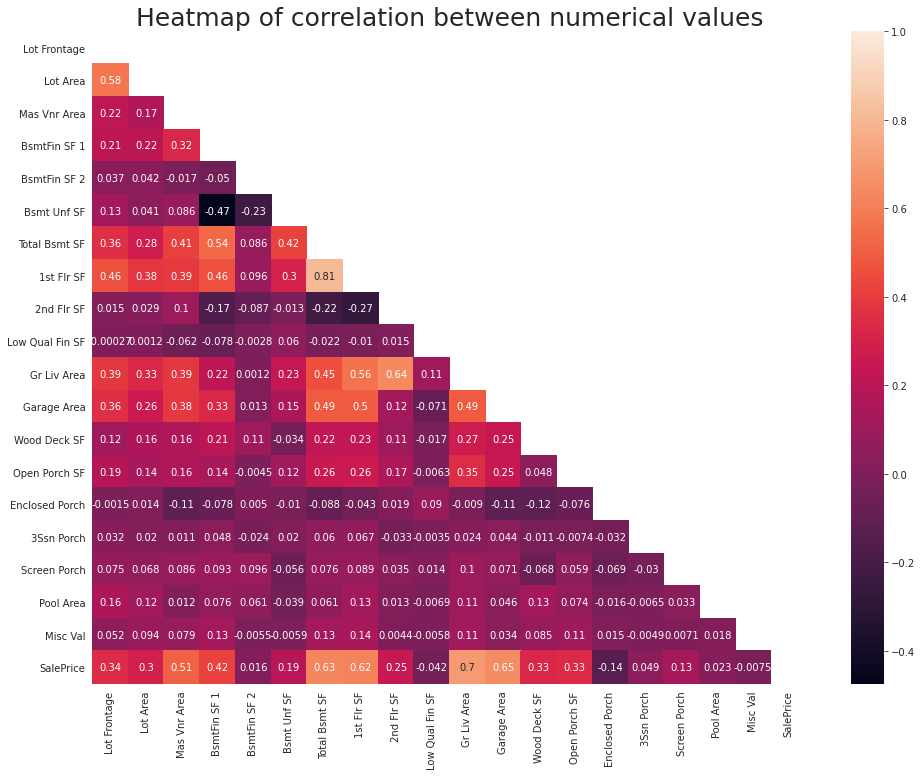

In [182]:
plt.figure(figsize=(16,12))

mask = np.zeros_like(continuous_vars.corr())
#mask 
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(continuous_vars.corr(),mask=mask, annot=True) 
    ax.set_title("Heatmap of correlation between numerical values", fontsize=25);

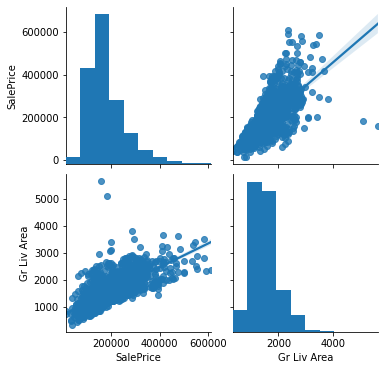

In [183]:
sns.pairplot(train[['SalePrice', 'Gr Liv Area']], kind='reg')

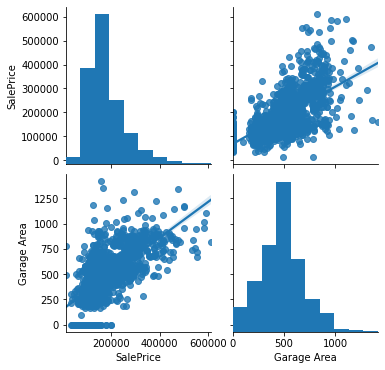

In [184]:
sns.pairplot(train[['SalePrice', 'Garage Area']], kind='reg')

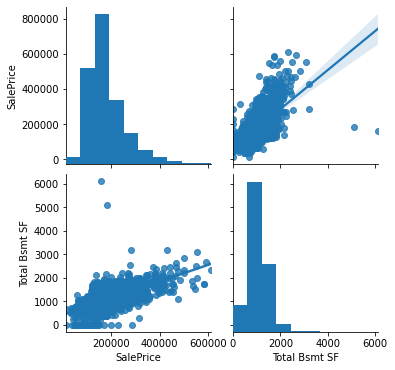

In [185]:
sns.pairplot(train[['SalePrice', 'Total Bsmt SF']], kind='reg')

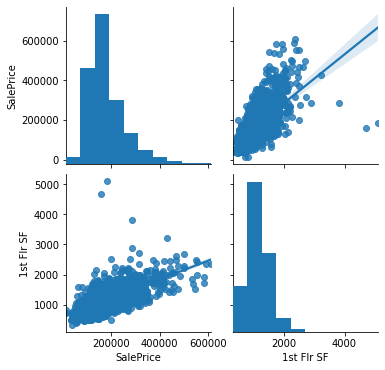

In [186]:
sns.pairplot(train[['SalePrice', '1st Flr SF']], kind='reg')

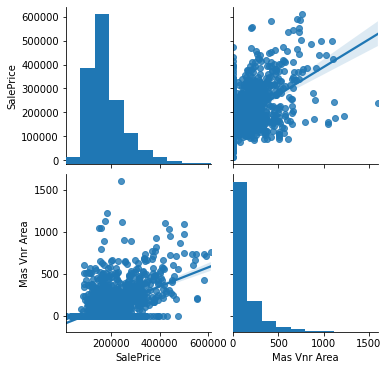

In [189]:
sns.pairplot(train[['SalePrice', 'Mas Vnr Area']], kind='reg')

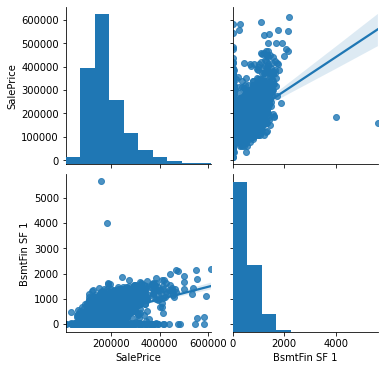

In [190]:
sns.pairplot(train[['SalePrice', 'BsmtFin SF 1']], kind='reg')

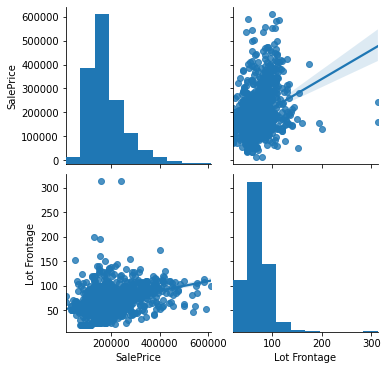

In [191]:
sns.pairplot(train[['SalePrice', 'Lot Frontage']], kind='reg')

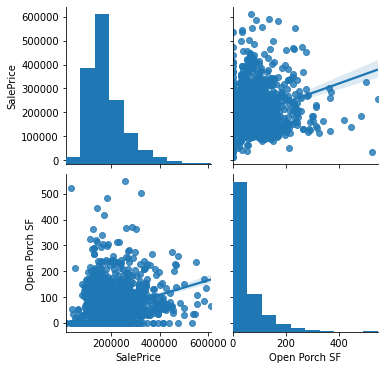

In [192]:
sns.pairplot(train[['SalePrice', 'Open Porch SF']], kind='reg')

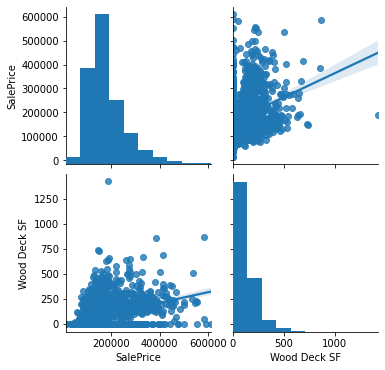

In [193]:
sns.pairplot(train[['SalePrice', 'Wood Deck SF']], kind='reg')

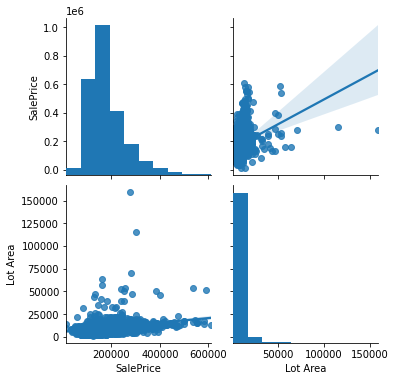

In [194]:
sns.pairplot(train[['SalePrice', 'Lot Area']], kind='reg')

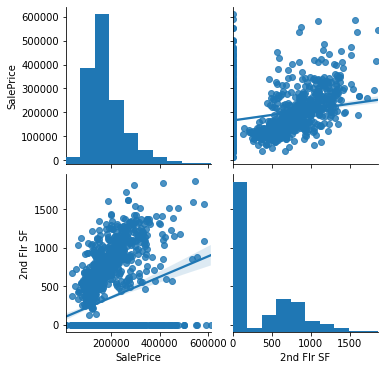

In [195]:
sns.pairplot(train[['SalePrice', '2nd Flr SF']], kind='reg')

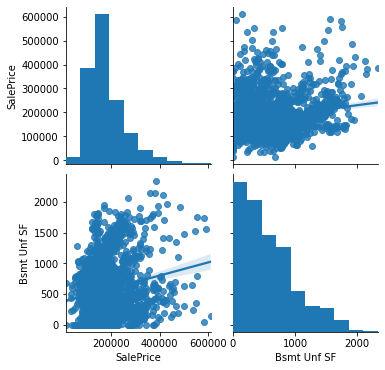

In [197]:
sns.pairplot(train[['SalePrice', 'Bsmt Unf SF']], kind='reg')

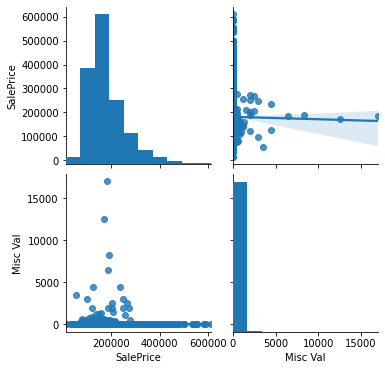

In [198]:
sns.pairplot(train[['SalePrice', 'Misc Val']], kind='reg')

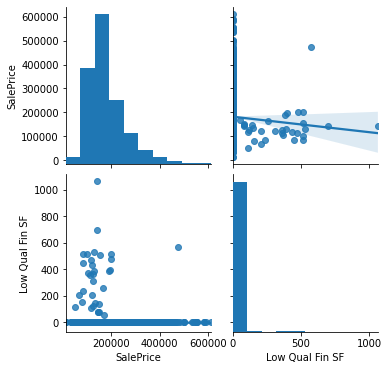

In [199]:
sns.pairplot(train[['SalePrice', 'Low Qual Fin SF']], kind='reg')

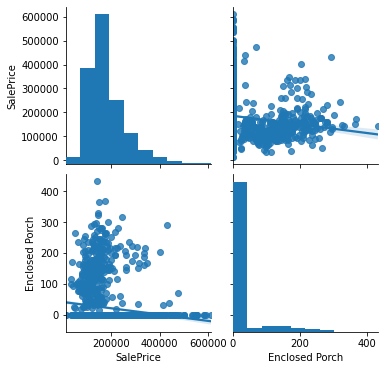

In [188]:
sns.pairplot(train[['SalePrice', 'Enclosed Porch']], kind='reg')

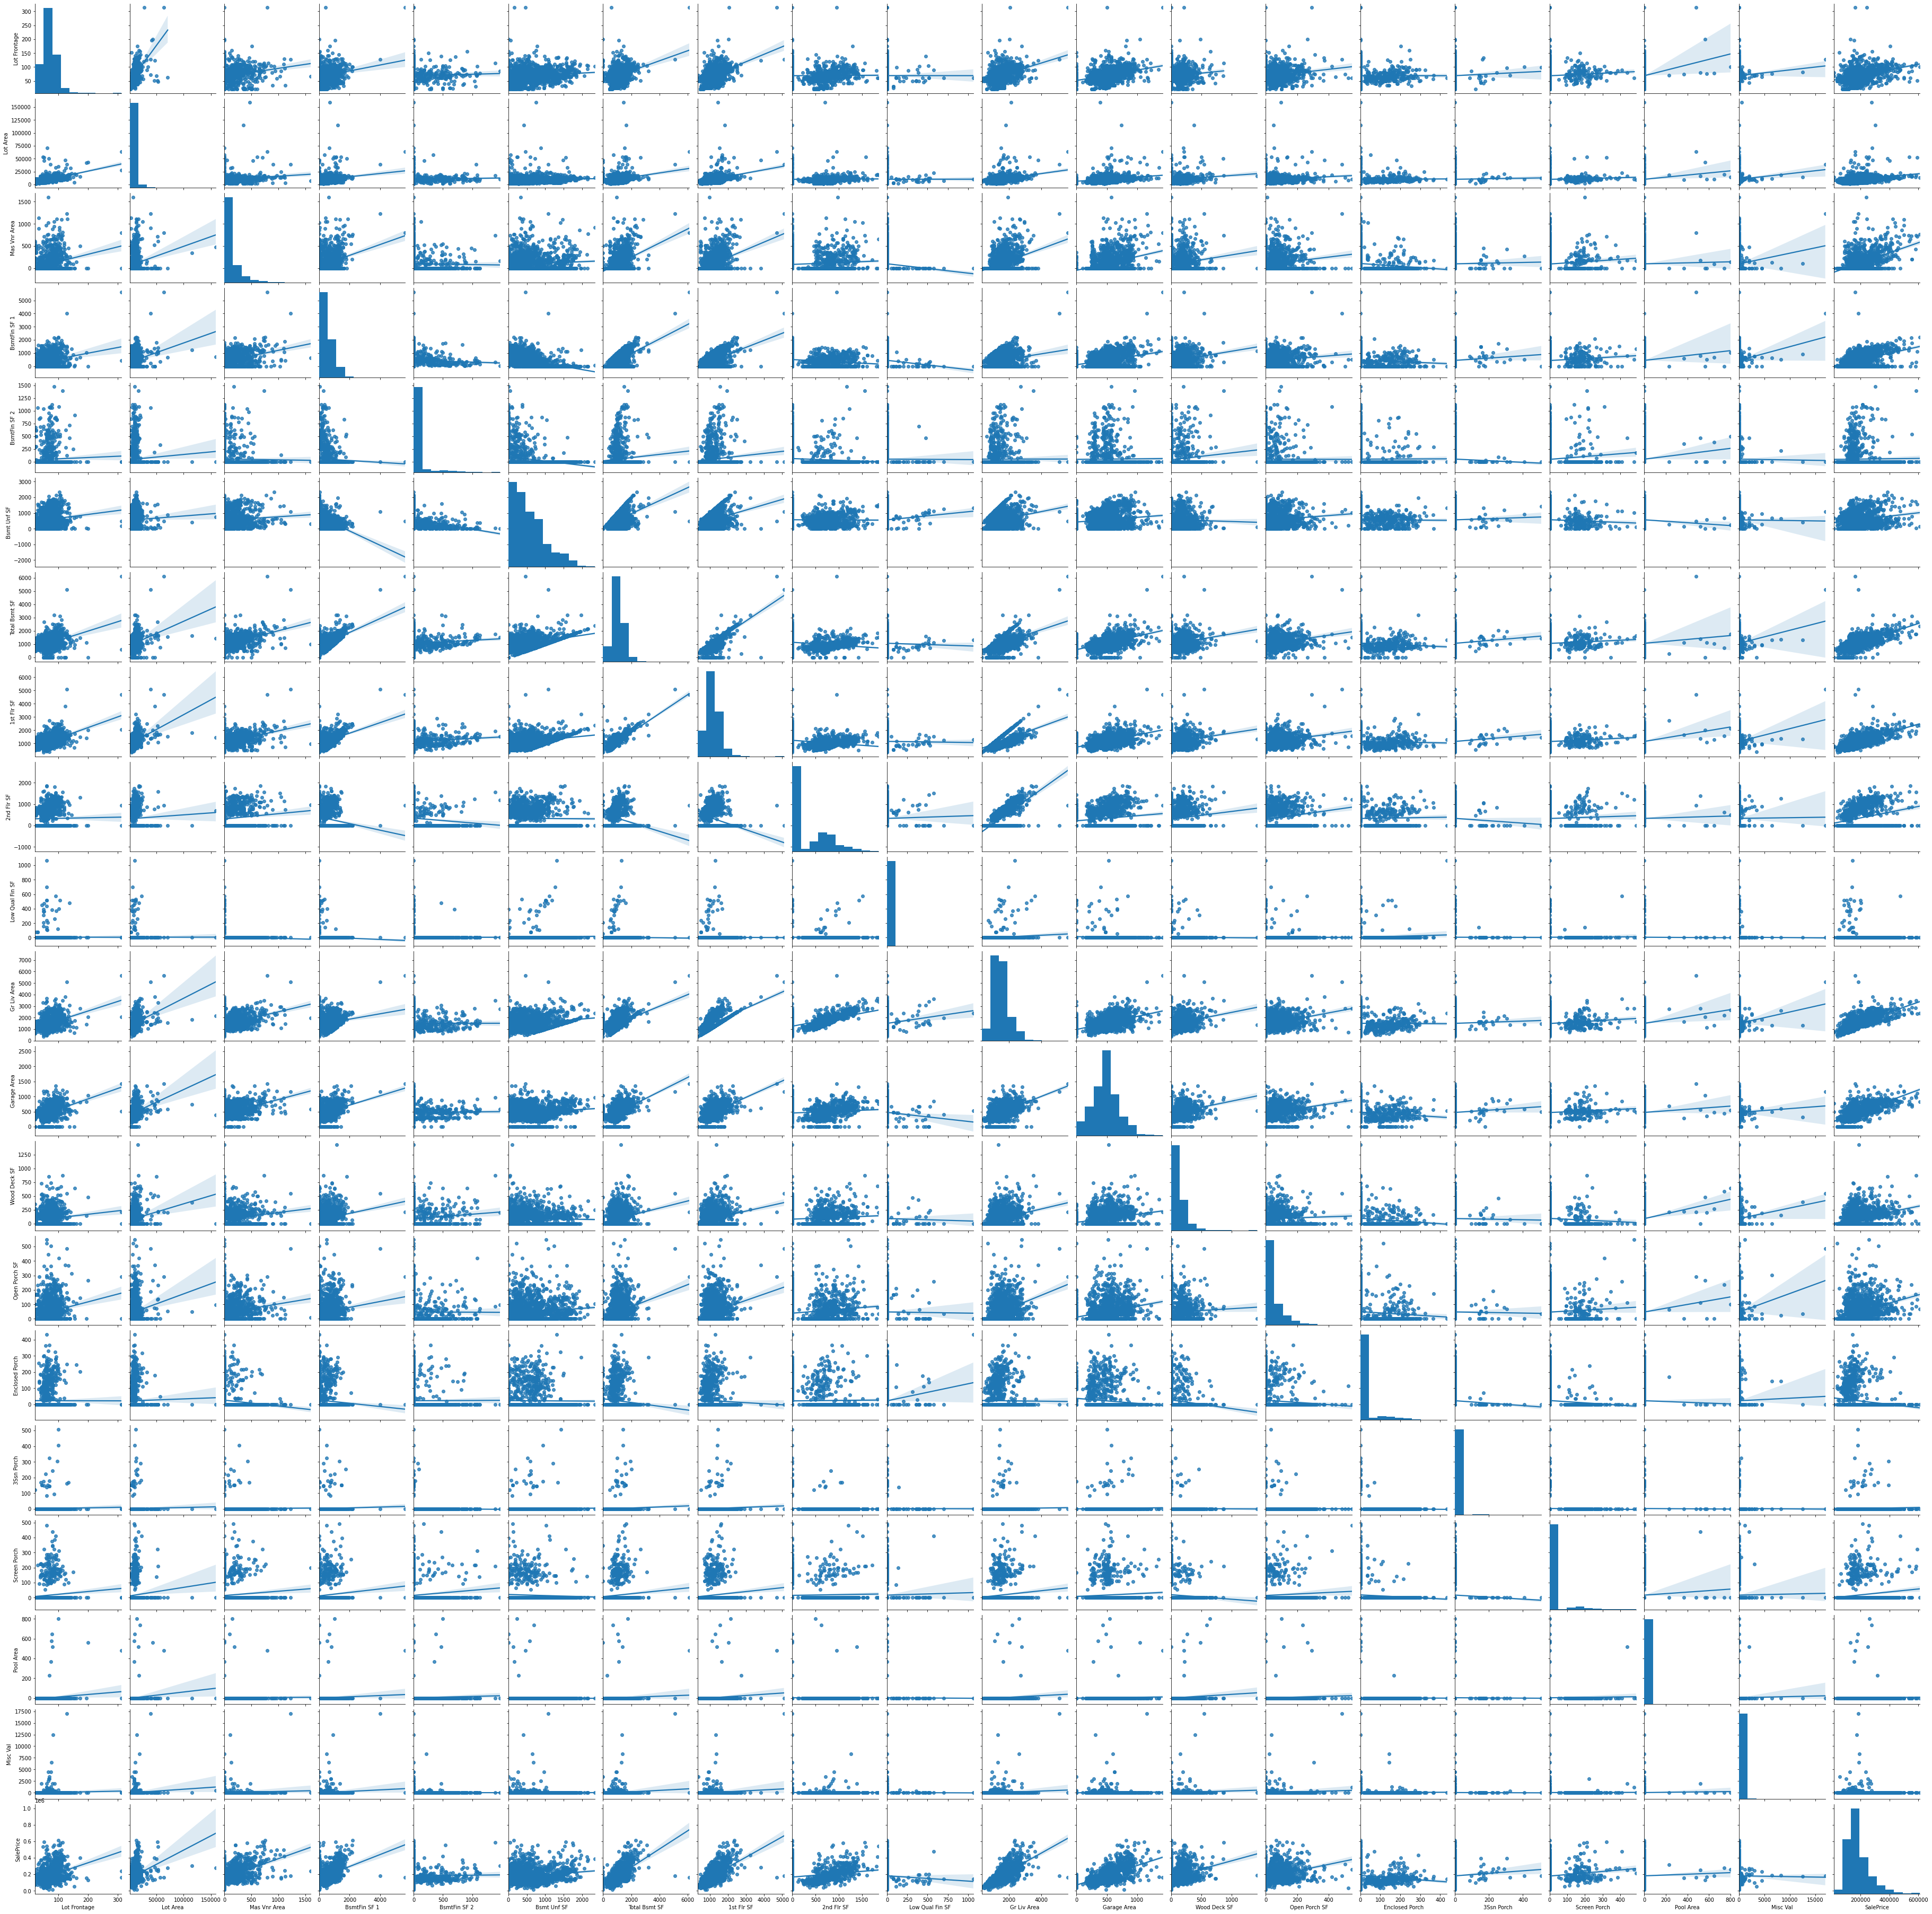

In [187]:
sns.pairplot(continuous_vars, kind='reg')

In [126]:
draft_categorical = train.select_dtypes(include=['object'])
draft_categorical.head()

Id        PID MS SubClass MS Zoning Street Alley Lot Shape Land Contour  \
0  109  533352170          60        RL   Pave    NA       IR1          Lvl   
1  544  531379050          60        RL   Pave    NA       IR1          Lvl   
2  153  535304180          20        RL   Pave    NA       Reg          Lvl   
3  318  916386060          60        RL   Pave    NA       Reg          Lvl   
4  255  906425045          50        RL   Pave    NA       IR1          Lvl   

  Utilities Lot Config  ... Fireplace Qu Garage Type Garage Finish  \
0    AllPub    CulDSac  ...           NA      Attchd           RFn   
1    AllPub    CulDSac  ...           TA      Attchd           RFn   
2    AllPub     Inside  ...           NA      Detchd           Unf   
3    AllPub     Inside  ...           NA     BuiltIn           Fin   
4    AllPub     Inside  ...           NA      Detchd           Unf   

  Garage Qual Garage Cond Paved Drive Pool QC Fence Misc Feature Sale Type  
0          TA          TA           Y      NA    NA           NA       WD   
1          TA          TA           Y      NA    NA           NA       WD   
2          TA          TA           Y      NA    NA           NA       WD   
3          TA          TA           Y      NA    NA           NA       WD   
4          TA          TA           N      NA    NA           NA       WD   

[5 rows x 45 columns]

In [ ]:
#first use categorical to house the transfers from numerical and continuous then concat to a single dataframe

In [227]:
num_to_cat = train.loc[:,['Id','Overall Qual', 'Overall Cond', 'Garage Cars', 'Year Built', 'Year Remod/Add', 
                           'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 
                           'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Mo Sold', 
                           'Yr Sold']]
num_to_cat.head()

Id  Overall Qual  Overall Cond  Garage Cars  Year Built  Year Remod/Add  \
0  109             6             8            2        1976            2005   
1  544             7             5            2        1996            1997   
2  153             5             7            1        1953            2007   
3  318             5             5            2        2006            2007   
4  255             6             8            2        1900            1993   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          1              3   
1               1               0          2          1              4   
2               1               0          1          0              3   
3               0               0          2          1              3   
4               0               0          2          0              3   

   Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Yr Blt  Mo Sold  Yr Sold  
0              1              6           0         1976.0        3     2010  
1              1              8           1         1997.0        4     2009  
2              1              5           0         1953.0        1     2010  
3              1              7           0         2007.0        4     2010  
4              1              6           0         1957.0        3     2010

In [208]:
num_to_cat.shape

(2049, 16)

In [228]:
categorical = draft_categorical.drop(['PID'], axis=1)

In [230]:
categorical = pd.merge(categorical, num_to_cat, on='Id')

In [231]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2048
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              2049 non-null   object 
 1   MS SubClass     2049 non-null   object 
 2   MS Zoning       2049 non-null   object 
 3   Street          2049 non-null   object 
 4   Alley           2049 non-null   object 
 5   Lot Shape       2049 non-null   object 
 6   Land Contour    2049 non-null   object 
 7   Utilities       2049 non-null   object 
 8   Lot Config      2049 non-null   object 
 9   Land Slope      2049 non-null   object 
 10  Neighborhood    2049 non-null   object 
 11  Condition 1     2049 non-null   object 
 12  Condition 2     2049 non-null   object 
 13  Bldg Type       2049 non-null   object 
 14  House Style     2049 non-null   object 
 15  Roof Style      2049 non-null   object 
 16  Roof Matl       2049 non-null   object 
 17  Exterior 1st    2049 non-null   o

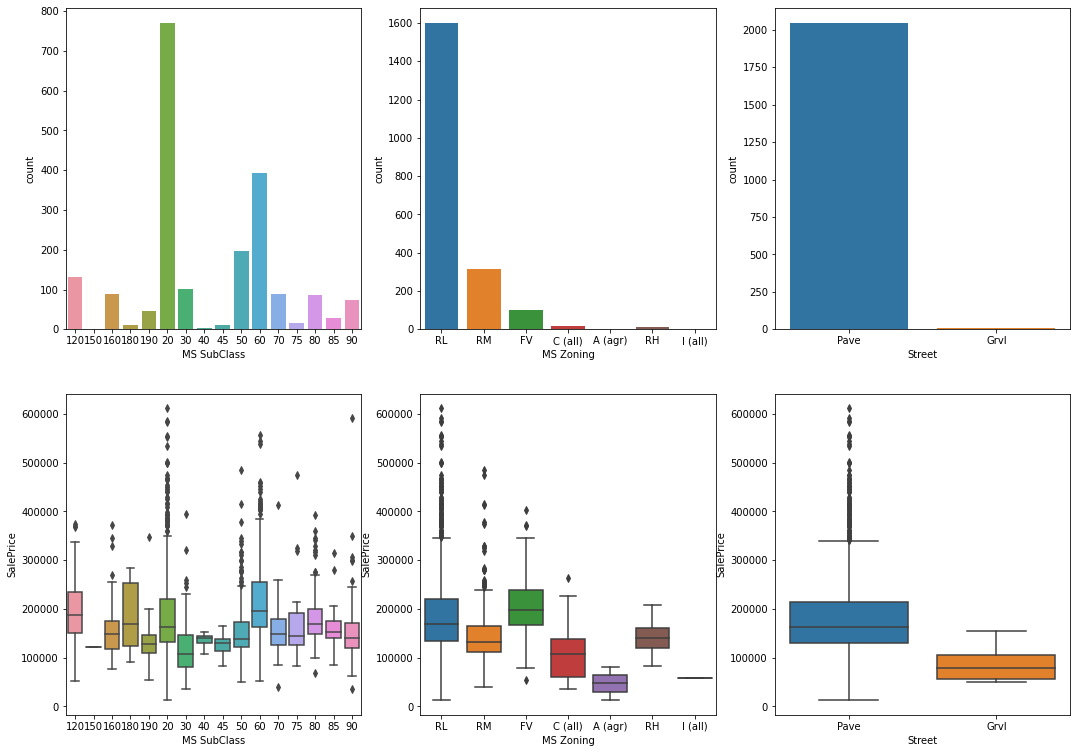

In [232]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='MS SubClass', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='MS Zoning', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Street', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='MS SubClass', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='MS Zoning', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Street', y=train['SalePrice'], ax=ax6)

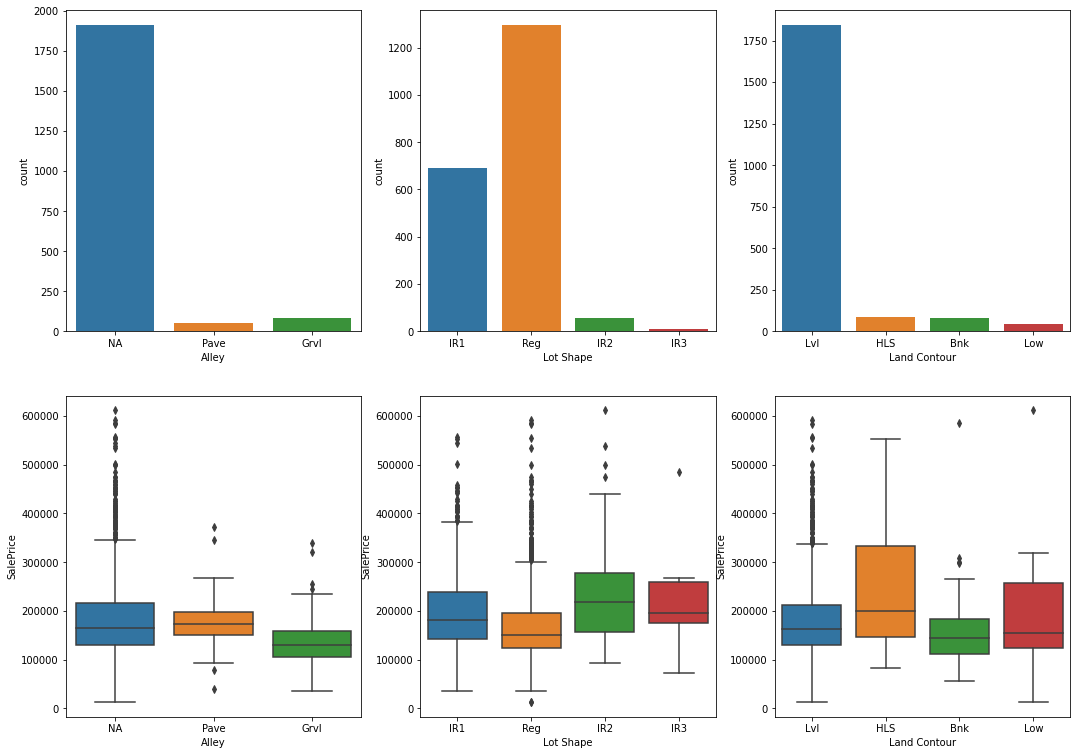

In [233]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Alley', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Lot Shape', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Land Contour', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Alley', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Lot Shape', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Land Contour', y=train['SalePrice'], ax=ax6)

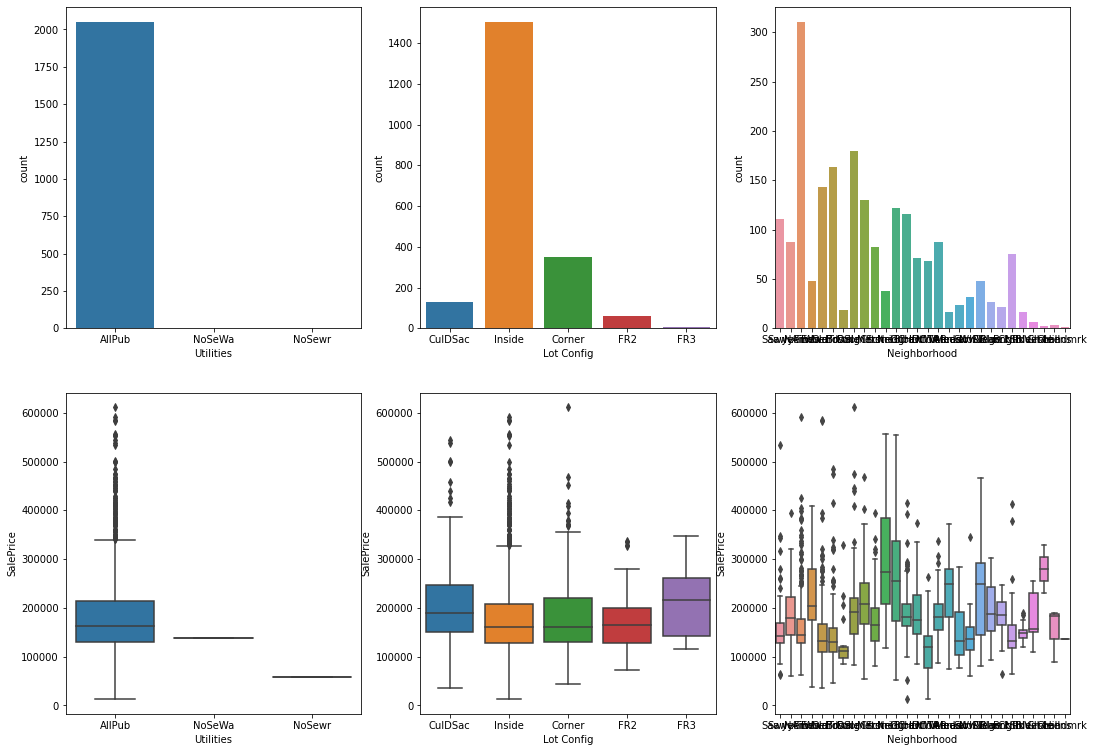

In [234]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Utilities', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Lot Config', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Neighborhood', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Utilities', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Lot Config', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Neighborhood', y=train['SalePrice'], ax=ax6)

[Text(0, 0, 'Sawyer'),
 Text(0, 0, 'SawyerW'),
 Text(0, 0, 'NAmes'),
 Text(0, 0, 'Timber'),
 Text(0, 0, 'Edwards'),
 Text(0, 0, 'OldTown'),
 Text(0, 0, 'BrDale'),
 Text(0, 0, 'CollgCr'),
 Text(0, 0, 'Somerst'),
 Text(0, 0, 'Mitchel'),
 Text(0, 0, 'StoneBr'),
 Text(0, 0, 'NridgHt'),
 Text(0, 0, 'Gilbert'),
 Text(0, 0, 'Crawfor'),
 Text(0, 0, 'IDOTRR'),
 Text(0, 0, 'NWAmes'),
 Text(0, 0, 'Veenker'),
 Text(0, 0, 'MeadowV'),
 Text(0, 0, 'SWISU'),
 Text(0, 0, 'NoRidge'),
 Text(0, 0, 'ClearCr'),
 Text(0, 0, 'Blmngtn'),
 Text(0, 0, 'BrkSide'),
 Text(0, 0, 'NPkVill'),
 Text(0, 0, 'Blueste'),
 Text(0, 0, 'GrnHill'),
 Text(0, 0, 'Greens'),
 Text(0, 0, 'Landmrk')]

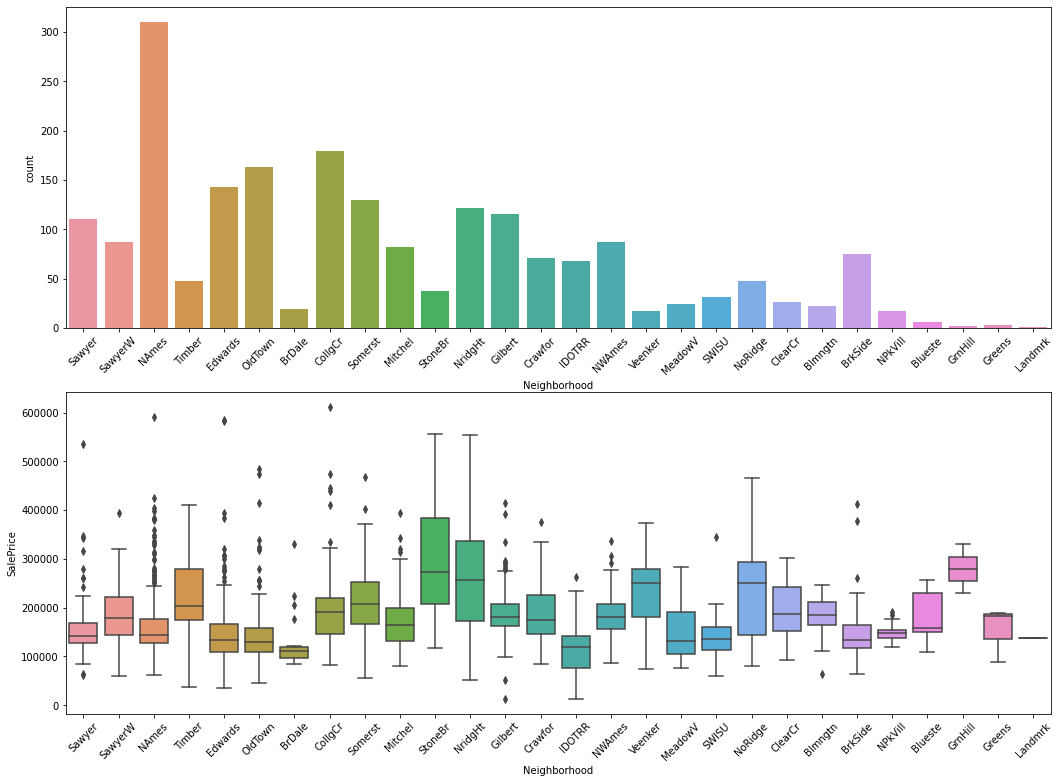

In [235]:
fig = plt.figure(figsize = (60,13))

ax1 = fig.add_subplot(2,3,1)
chart = sns.countplot(data = categorical, x='Neighborhood', ax=ax1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

ax2 = fig.add_subplot(2,3,4)
chart = sns.boxplot(data = categorical, x='Neighborhood', y=train['SalePrice'], ax=ax2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

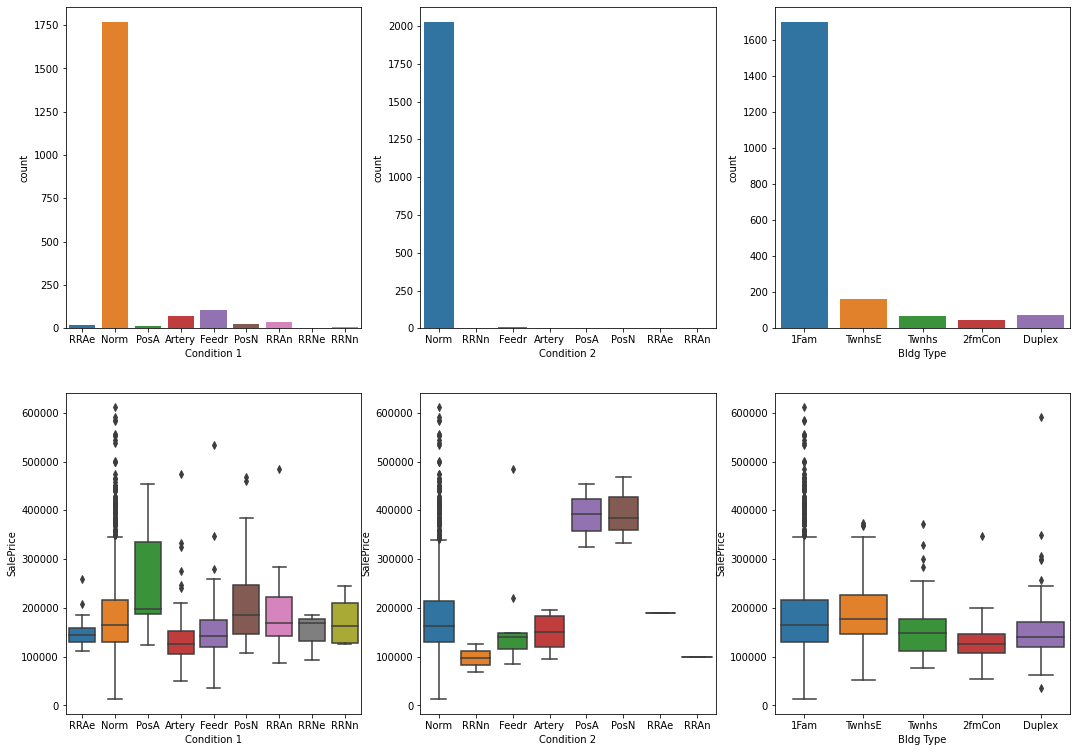

In [236]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Condition 1', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Condition 2', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Bldg Type', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Condition 1', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Condition 2', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Bldg Type', y=train['SalePrice'], ax=ax6)

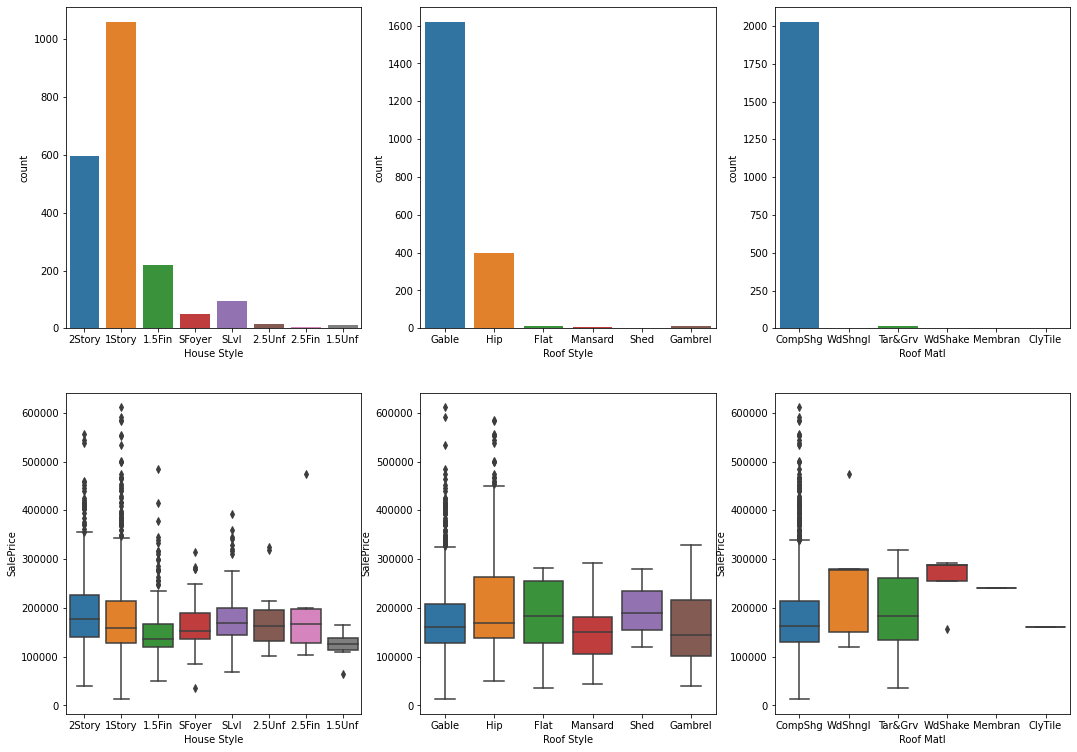

In [237]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='House Style', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Roof Style', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Roof Matl', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='House Style', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Roof Style', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Roof Matl', y=train['SalePrice'], ax=ax6)

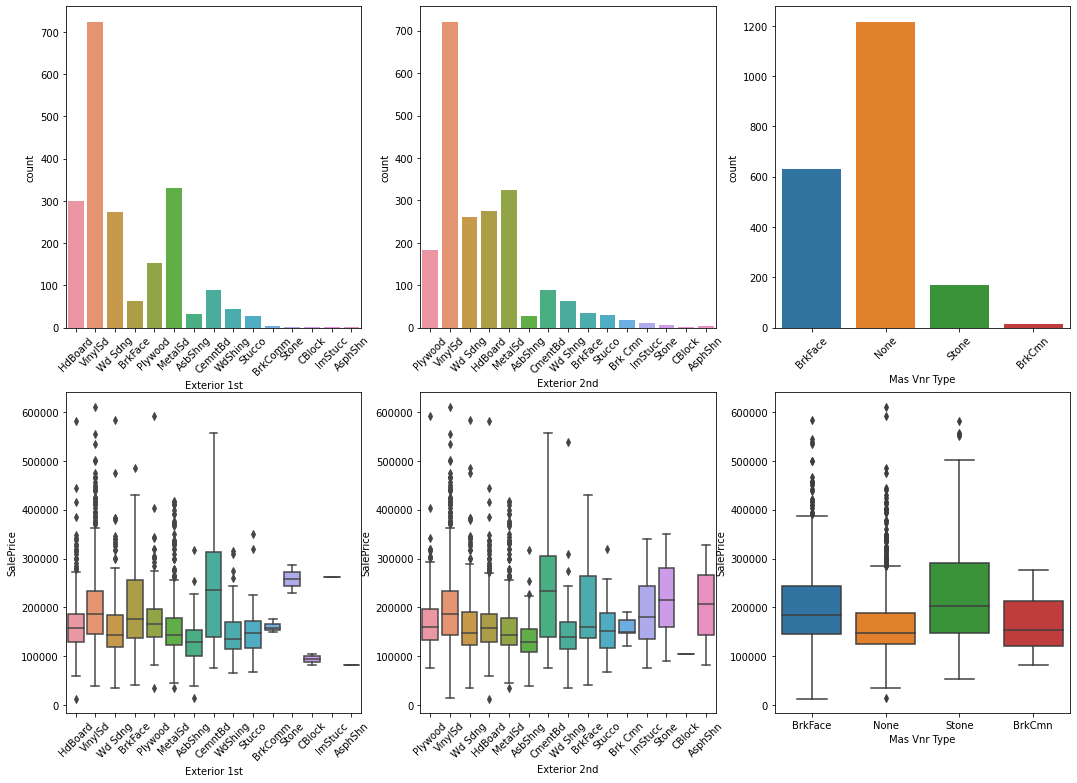

In [238]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
chart = sns.countplot(data = categorical, x='Exterior 1st', ax=ax1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

ax2 = fig.add_subplot(2,3,2)
chart = sns.countplot(data = categorical, x='Exterior 2nd', ax=ax2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

ax3 = fig.add_subplot(2,3,3)
chart = sns.countplot(data = categorical, x='Mas Vnr Type', ax=ax3)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

ax4 = fig.add_subplot(2,3,4)
chart = sns.boxplot(data = categorical, x='Exterior 1st', y=train['SalePrice'], ax=ax4)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

ax5 = fig.add_subplot(2,3,5)
chart = sns.boxplot(data = categorical, x='Exterior 2nd', y=train['SalePrice'], ax=ax5)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

ax6 = fig.add_subplot(2,3,6)
chart = sns.boxplot(data = categorical, x='Mas Vnr Type', y=train['SalePrice'], ax=ax6)

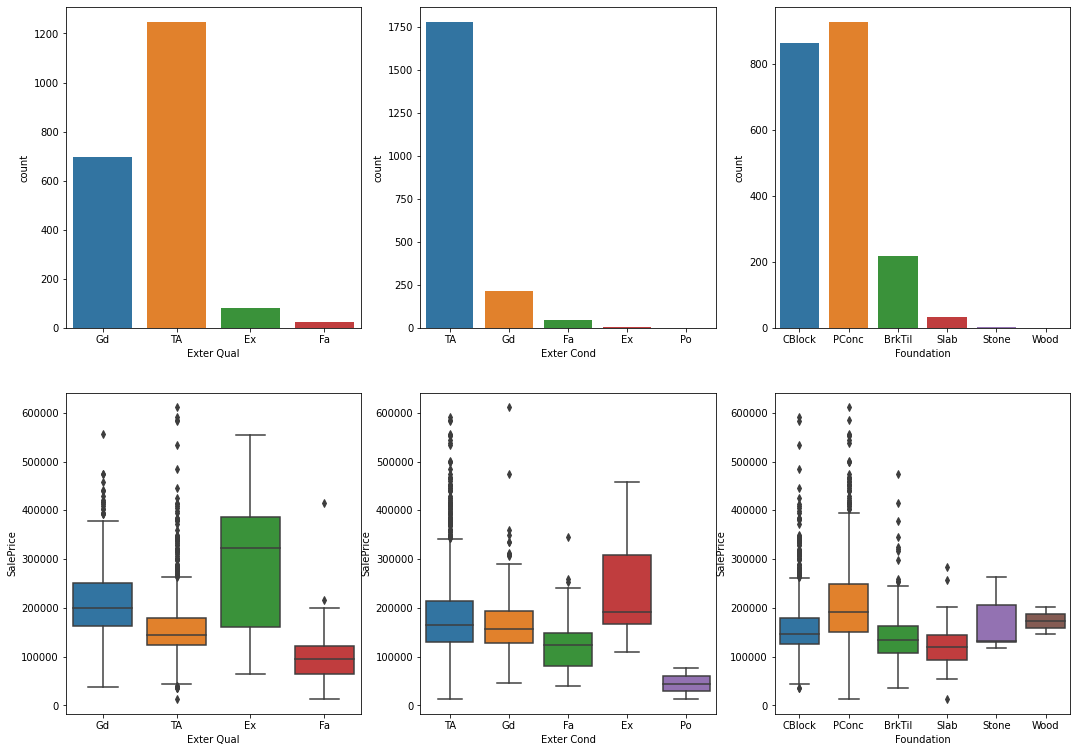

In [239]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Exter Qual', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Exter Cond', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Foundation', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Exter Qual', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Exter Cond', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Foundation', y=train['SalePrice'], ax=ax6)

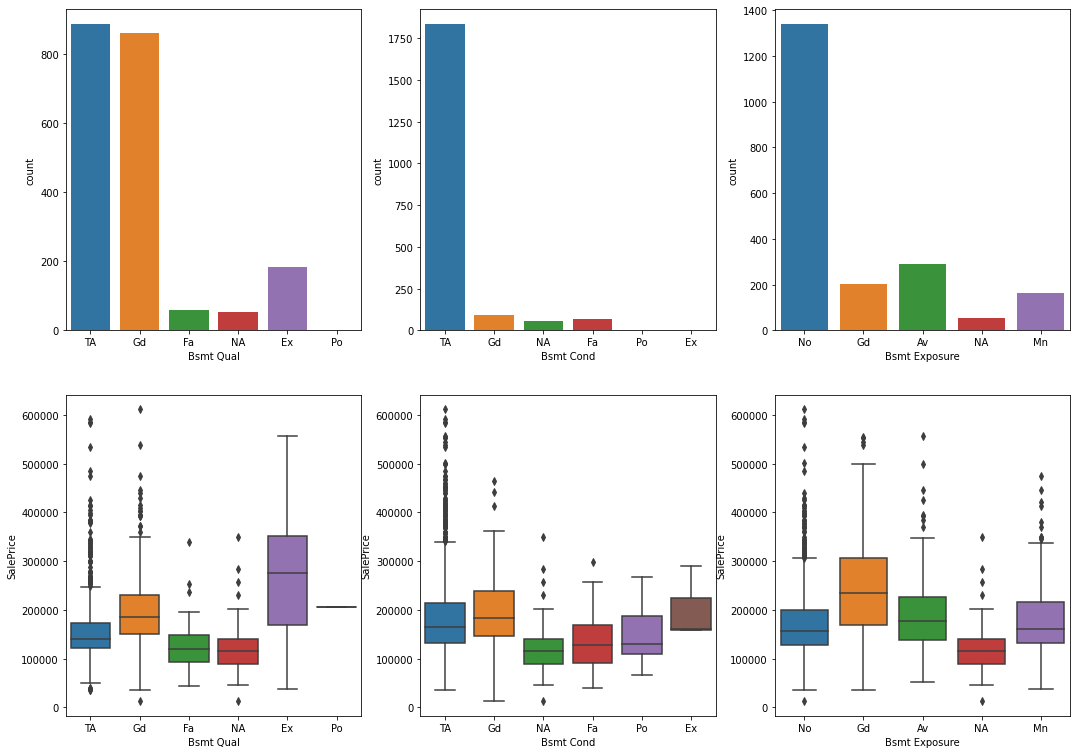

In [240]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Bsmt Qual', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Bsmt Cond', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Bsmt Exposure', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Bsmt Qual', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Bsmt Cond', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Bsmt Exposure', y=train['SalePrice'], ax=ax6)

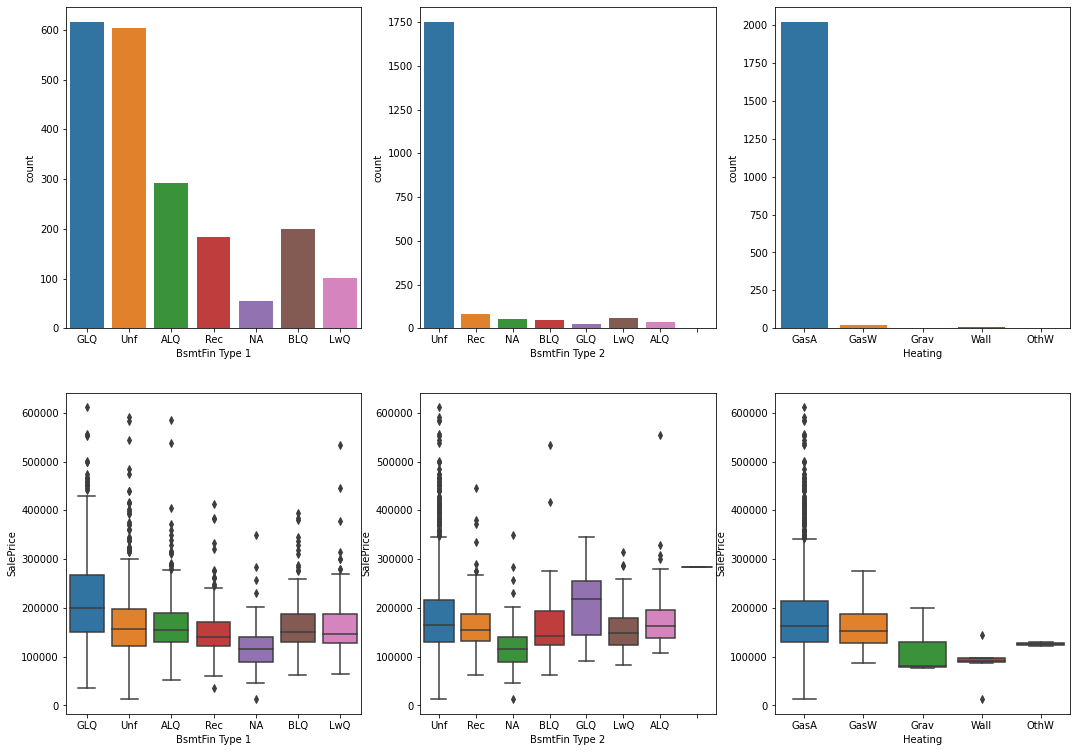

In [241]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='BsmtFin Type 1', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='BsmtFin Type 2', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Heating', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='BsmtFin Type 1', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='BsmtFin Type 2', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Heating', y=train['SalePrice'], ax=ax6)

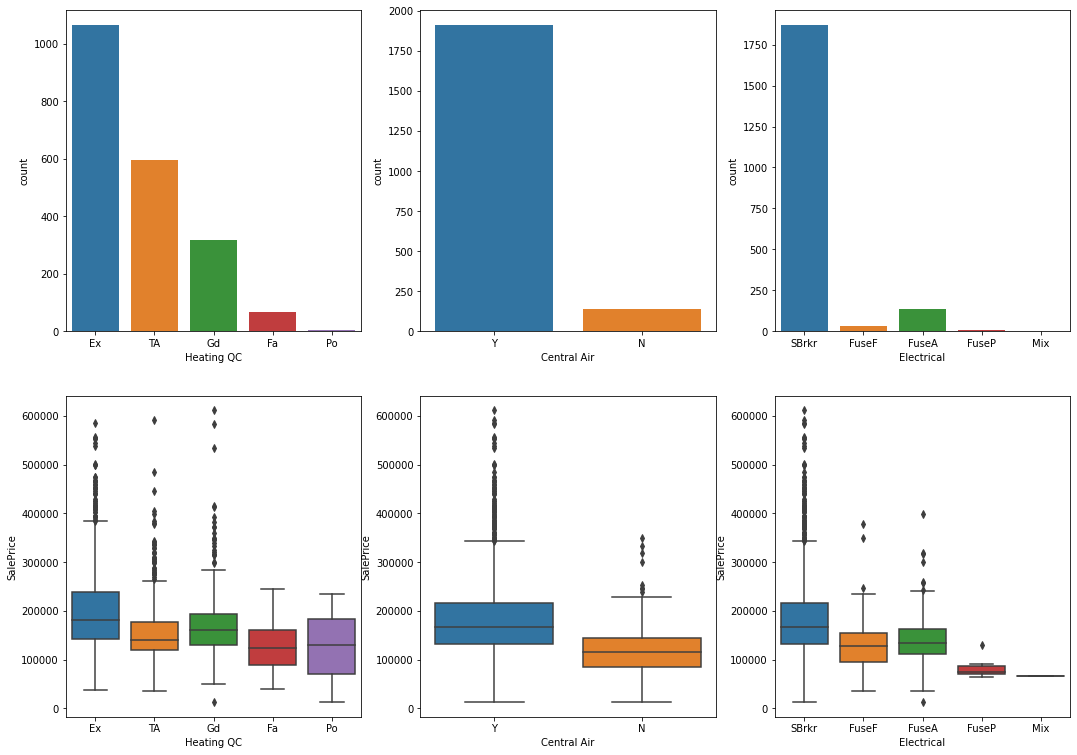

In [242]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Heating QC', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Central Air', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Electrical', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Heating QC', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Central Air', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Electrical', y=train['SalePrice'], ax=ax6)

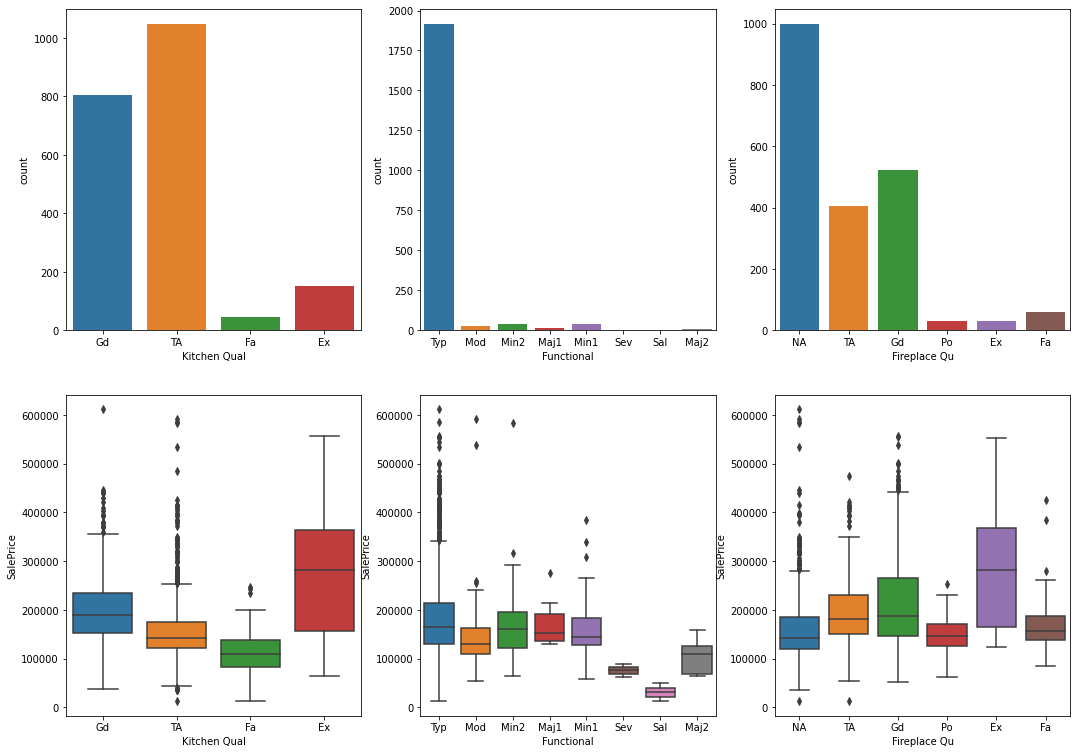

In [243]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Kitchen Qual', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Functional', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Fireplace Qu', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Kitchen Qual', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Functional', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Fireplace Qu', y=train['SalePrice'], ax=ax6)

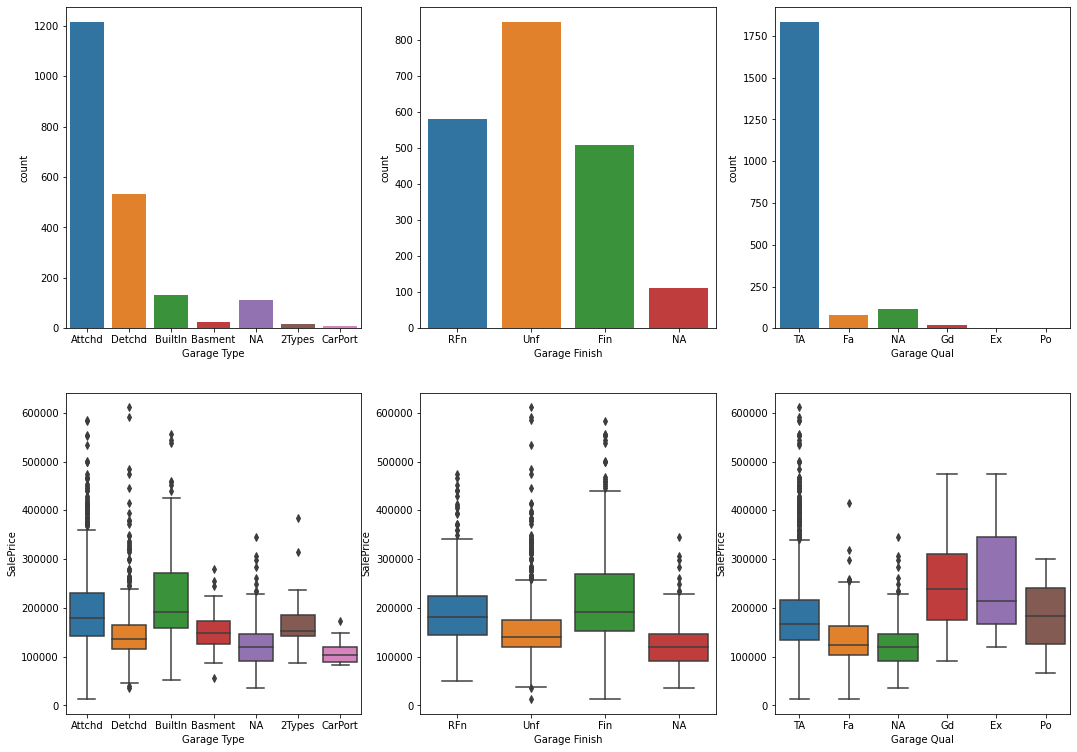

In [244]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Garage Type', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Garage Finish', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Garage Qual', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Garage Type', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Garage Finish', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Garage Qual', y=train['SalePrice'], ax=ax6)

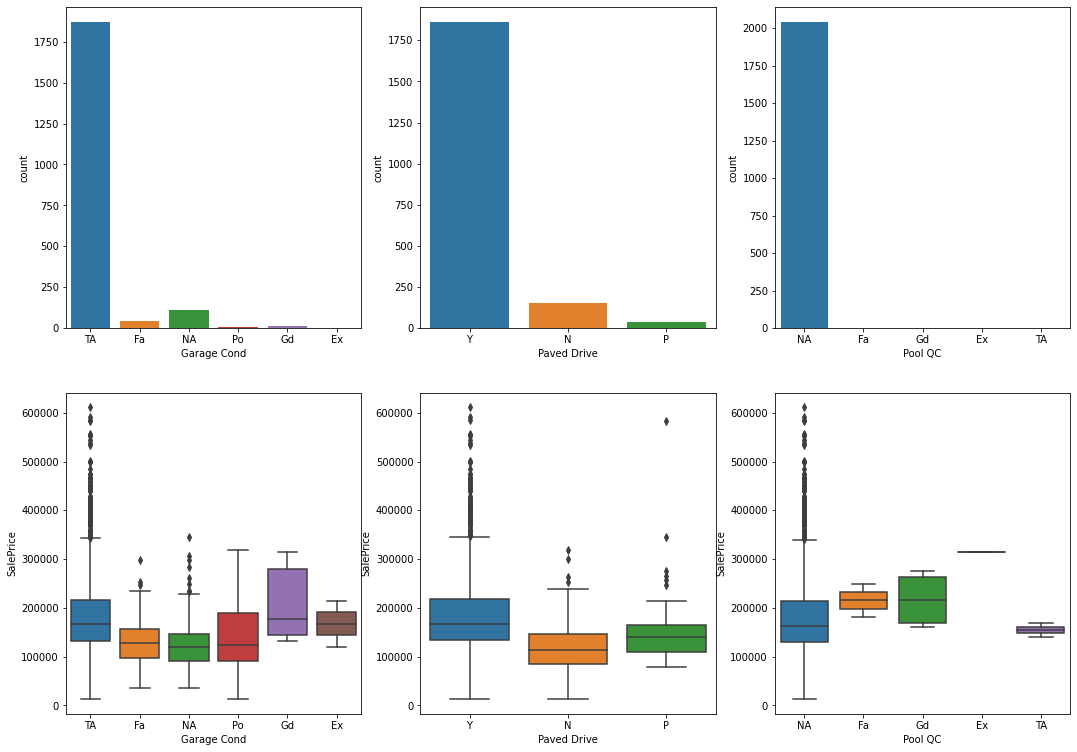

In [245]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Garage Cond', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Paved Drive', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Pool QC', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Garage Cond', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Paved Drive', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Pool QC', y=train['SalePrice'], ax=ax6)

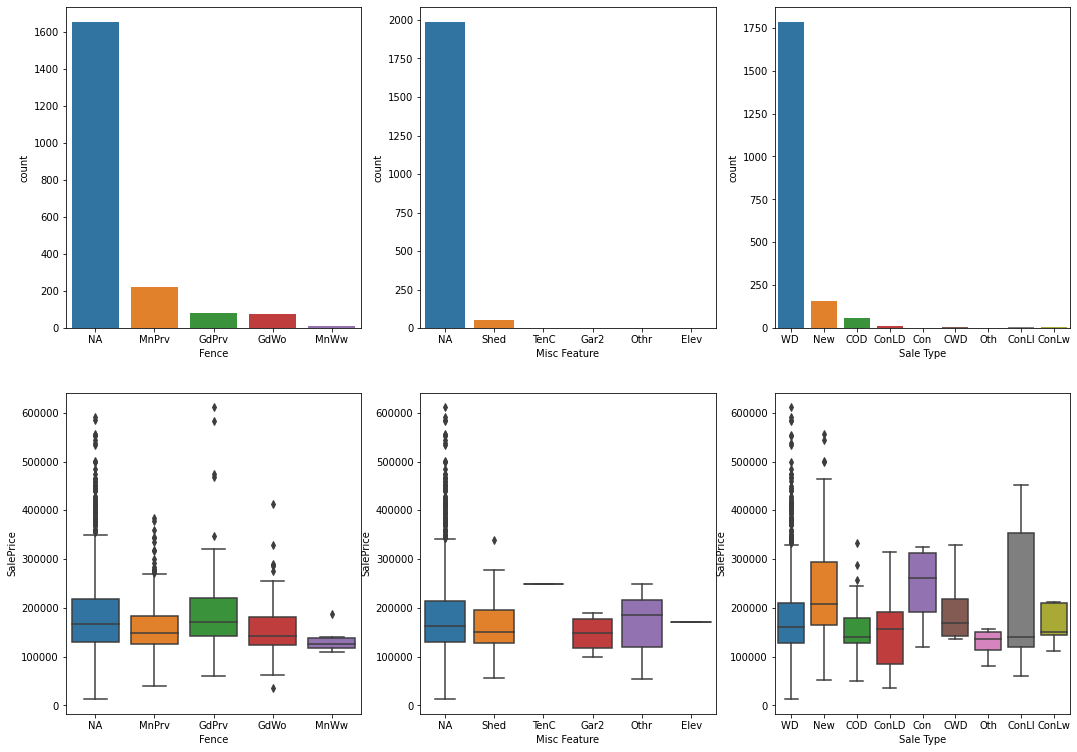

In [246]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Fence', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Misc Feature', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Sale Type', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Fence', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Misc Feature', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Sale Type', y=train['SalePrice'], ax=ax6)

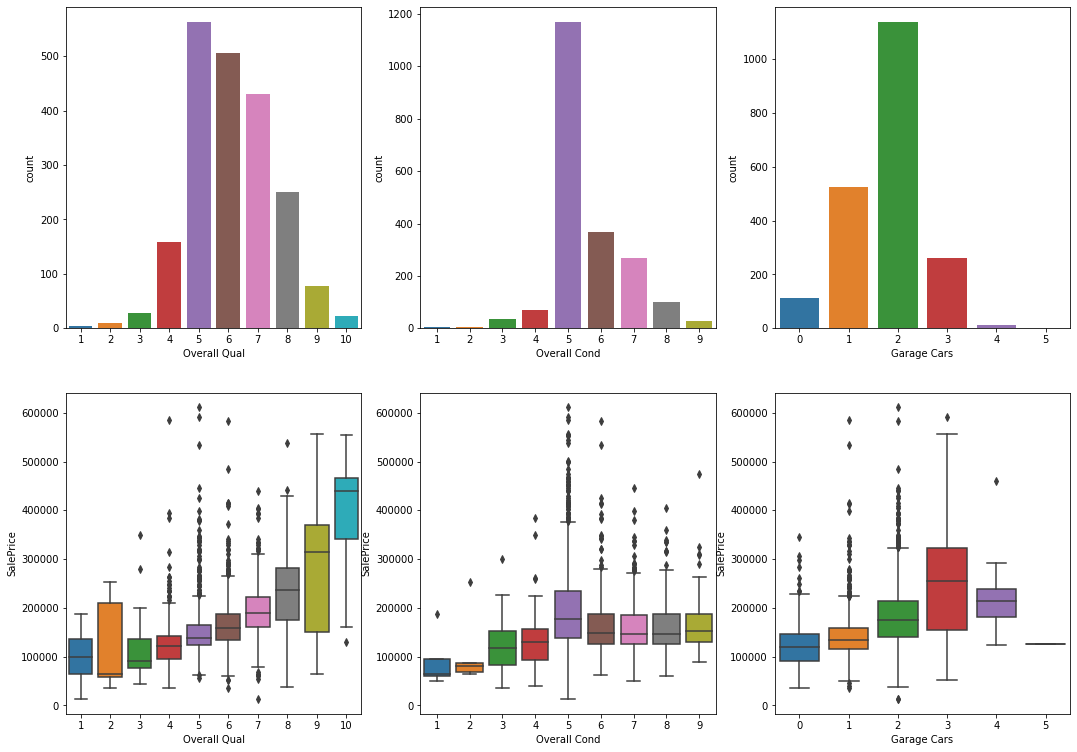

In [247]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Overall Qual', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Overall Cond', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Garage Cars', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Overall Qual', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Overall Cond', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Garage Cars', y=train['SalePrice'], ax=ax6)

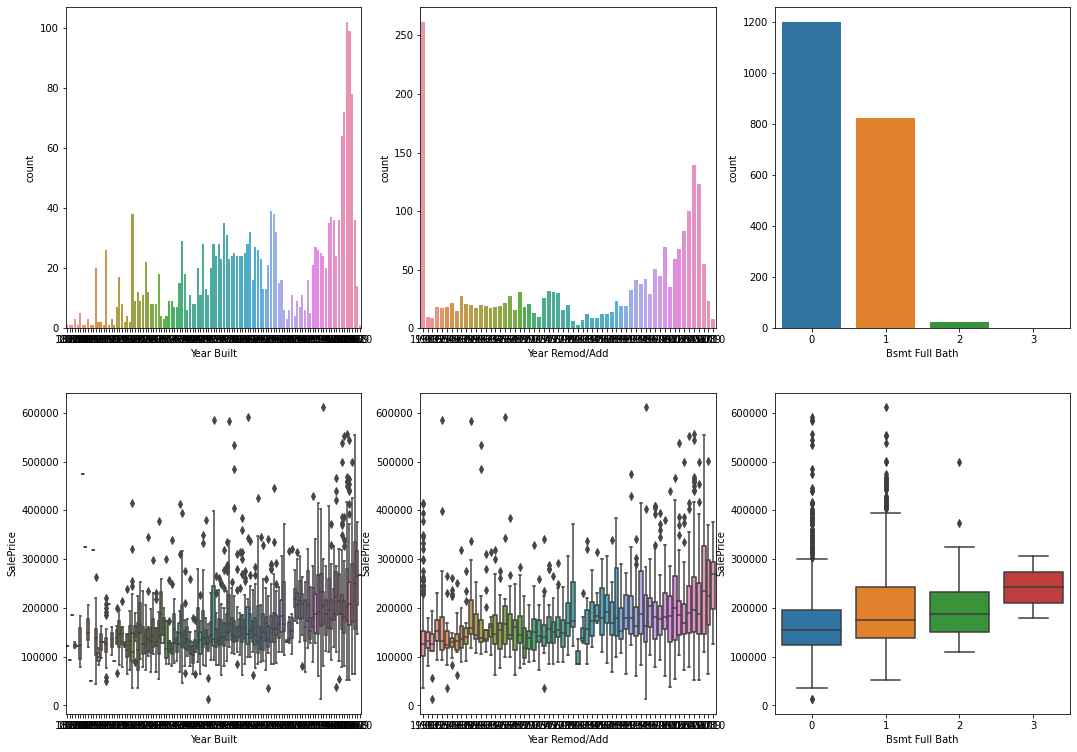

In [248]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Year Built', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Year Remod/Add', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Bsmt Full Bath', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Year Built', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Year Remod/Add', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Bsmt Full Bath', y=train['SalePrice'], ax=ax6)

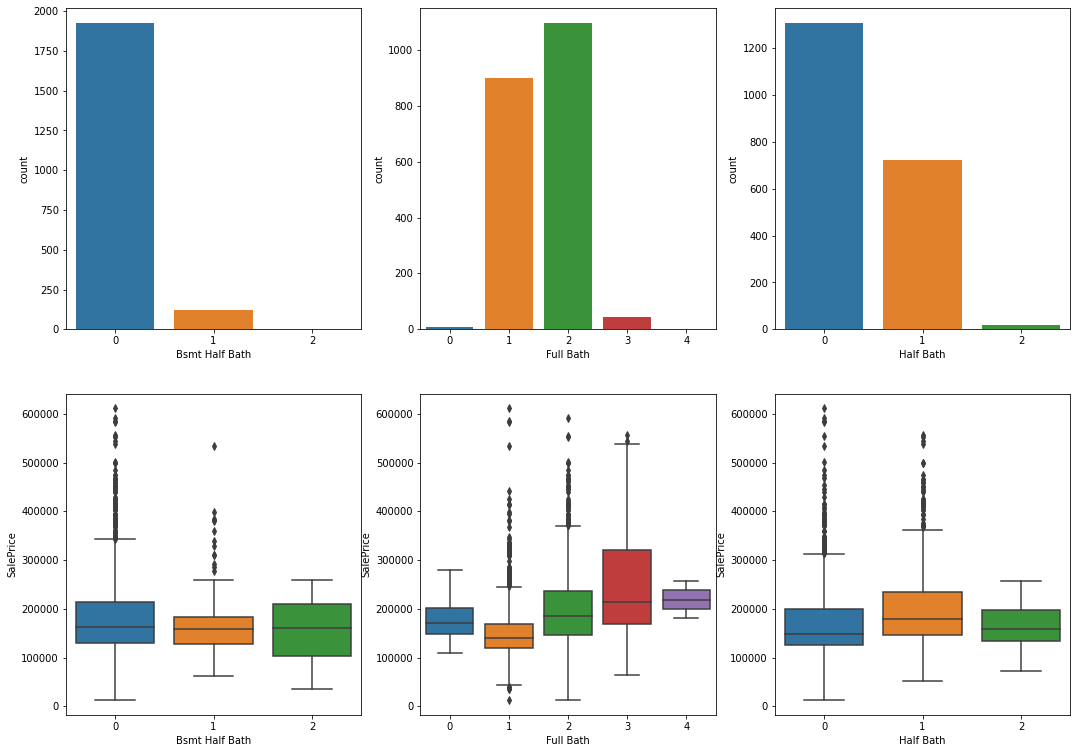

In [249]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Bsmt Half Bath', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Full Bath', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Half Bath', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Bsmt Half Bath', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Full Bath', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Half Bath', y=train['SalePrice'], ax=ax6)

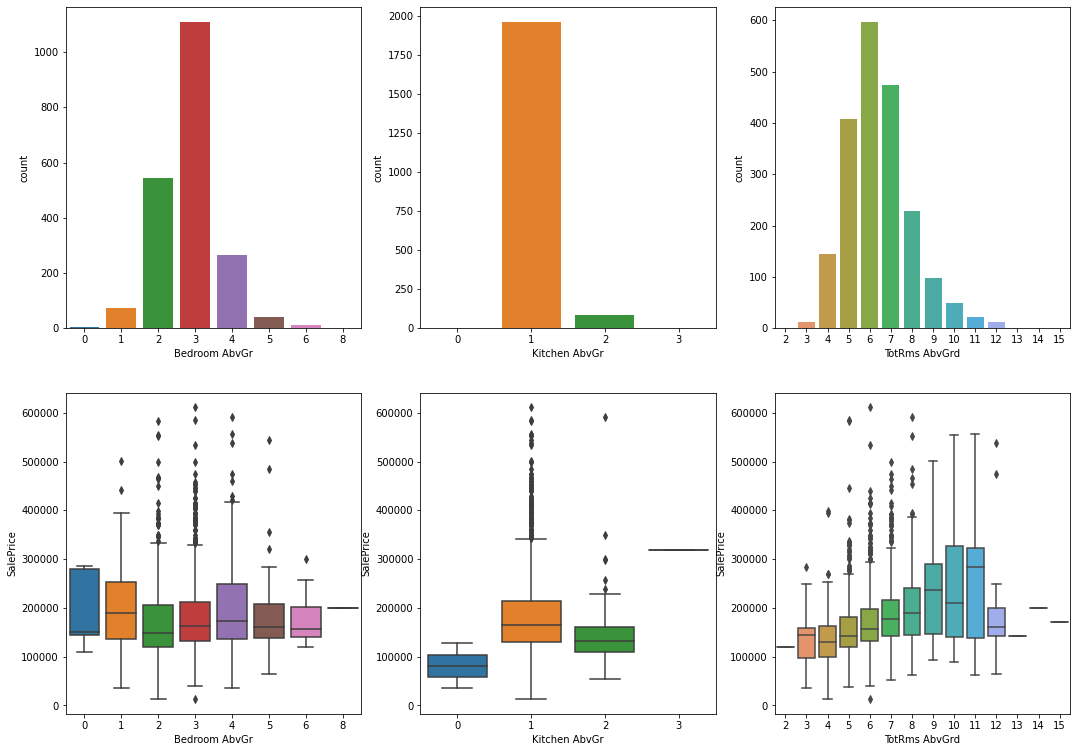

In [252]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Bedroom AbvGr', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Kitchen AbvGr', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='TotRms AbvGrd', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Bedroom AbvGr', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Kitchen AbvGr', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='TotRms AbvGrd', y=train['SalePrice'], ax=ax6)

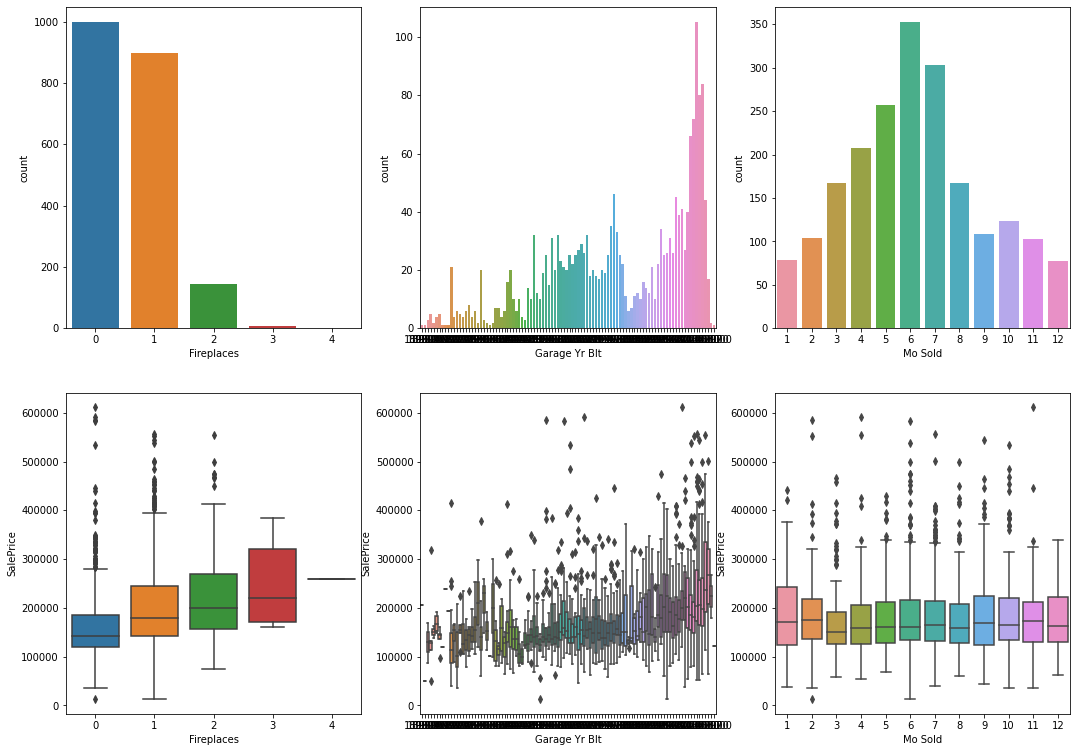

In [253]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Fireplaces', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Garage Yr Blt', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Mo Sold', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Fireplaces', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Garage Yr Blt', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Mo Sold', y=train['SalePrice'], ax=ax6)

In [257]:
train.to_csv('../datasets/train_df.csv')

In [256]:
test.to_csv('../datasets/test_df.csv')

## Dealing with Outliers

In [ ]:
#come back to it after some modeling